In [284]:
from bs4 import BeautifulSoup
import requests
import time, os
import re
import pandas as pd
import numpy as np

In [285]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

chromedriver = "/snap/bin/chromium.chromedriver" # path to the chromedriver executable
os.environ["webdriver.chrome.driver"] = chromedriver

In [286]:
from IPython.core.display import display, HTML

In [287]:
def get_countries(soup):
    country_names = []
    country_codes = []

    for tag in soup.find_all('option'):
        country_names.append(tag.text.strip())
        country_codes.append(tag.get('value')[-7:-5])

    # To remove the 1st and 2nd entries 'Please select a country to view' & 'World'
    country_names.pop(0)
    country_names.pop(0)
    country_codes.pop(0)
    country_codes.pop(0)
    country_codes.pop(-1) # and also EU at the end
    country_names.pop(-1)
    return (country_names, country_codes)

In [288]:
def get_countries_old(soup):
    country_names = []
    country_codes = []

    for tag in soup.find_all('option'):
        country_names.append(tag.text.strip())
        country_codes.append(tag.get('value'))

    # To remove the 1st and 2nd entries 'Please select a country to view' & 'World'
    country_names.pop(0)
    country_names.pop(0)
    country_codes.pop(0)
    country_codes.pop(0)
    country_codes.pop(-1) # and also EU at the end
    country_names.pop(-1)
    return (country_names, country_codes)

In [289]:
# go to each field page and scrape every country's data for that field
# Area: land and water

In [290]:
area_data = []

In [291]:
# this only works for years 2015-2017
for year in range(2015, 2018, 1):
    area_file = "file:///home/melissa/Downloads/factbook-" + str(year) + "/fields/2147.html"
    driver = webdriver.Chrome(chromedriver)
    driver.get(area_file)
    area_soup = BeautifulSoup(driver.page_source, 'html5lib')
    
    # in case country names change year-to-year
    country_names, country_codes = get_countries(area_soup)
    
    for i in range(0, len(country_codes)):    
        areas = area_soup.find('tr', id=country_codes[i]).find_all('strong')
        land_area, water_area = np.nan, np.nan
        for item in areas:
            area = item.next_sibling.split()[0]
            if item.text == 'land: ' and not area[0].isalpha():
                land_area = float(area.replace(',', ''))
            elif item.text == 'water: ' and not area[0].isalpha():
                water_area = float(area.replace(',', ''))
        area_data.append([country_names[i], year, land_area, water_area])

In [292]:
# Area: land and water
# for years 2009-2014
for year in range(2009, 2015, 1):
    area_file = "file:///home/melissa/Downloads/factbook-" + str(year) + "/fields/2147.html"
    driver = webdriver.Chrome(chromedriver)
    driver.get(area_file)
    area_soup = BeautifulSoup(driver.page_source, 'html5lib')
    
    # sometimes country names change
    if year > 2012:
        country_names, country_codes = get_countries(area_soup)
    else:
        country_names, country_codes = get_countries_old(area_soup)
    
    for i in range(0, len(country_codes)):
        
        if area_soup.find('table', id=country_codes[i]) != None:
            areas = area_soup.find('table', id=country_codes[i]).find('td', class_='category_data').find_all('strong')
            land_area, water_area = np.nan, np.nan
            for item in areas:
                area = item.next_sibling.split()[0]
                if item.text == 'land:' and not area[0].isalpha():
                    land_area = float(area.replace(',', ''))
                elif item.text == 'water:' and not area[0].isalpha():
                    water_area = float(area.replace(',', ''))
        else:
            land_area, water_area = np.nan, np.nan
            
        area_data.append([country_names[i], year, land_area, water_area])

In [293]:
area_data

[['Afghanistan', 2015, 652230.0, 0.0],
 ['Akrotiri', 2015, nan, nan],
 ['Albania', 2015, 27398.0, 1350.0],
 ['Algeria', 2015, 2381741.0, 0.0],
 ['American Samoa', 2015, 199.0, 0.0],
 ['Andorra', 2015, 468.0, 0.0],
 ['Angola', 2015, 1246700.0, 0.0],
 ['Anguilla', 2015, 91.0, 0.0],
 ['Antarctica', 2015, 14.0, nan],
 ['Antigua and Barbuda', 2015, 442.6, 0.0],
 ['Arctic Ocean', 2015, nan, nan],
 ['Argentina', 2015, 2736690.0, 43710.0],
 ['Armenia', 2015, 28203.0, 1540.0],
 ['Aruba', 2015, 180.0, 0.0],
 ['Ashmore and Cartier Islands', 2015, 5.0, 0.0],
 ['Atlantic Ocean', 2015, nan, nan],
 ['Australia', 2015, 7682300.0, 58920.0],
 ['Austria', 2015, 82445.0, 1426.0],
 ['Azerbaijan', 2015, 82629.0, 3971.0],
 ['Bahamas, The', 2015, 10010.0, 3870.0],
 ['Bahrain', 2015, 760.0, 0.0],
 ['Baker Island', 2015, nan, nan],
 ['Bangladesh', 2015, 130170.0, 18290.0],
 ['Barbados', 2015, 430.0, 0.0],
 ['Belarus', 2015, 202900.0, 4700.0],
 ['Belgium', 2015, 30278.0, 250.0],
 ['Belize', 2015, 22806.0, 160.0]

In [294]:
# now find population
# this only works for years 2015-2017
# Note: 2015 Population page is not set up properly, so it doesn't work, all NaNs
pop_data = []
for year in range(2015, 2018, 1):
    pop_file = "file:///home/melissa/Downloads/factbook-" + str(year) + "/fields/2119.html"
    driver = webdriver.Chrome(chromedriver)
    driver.get(pop_file)
    pop_soup = BeautifulSoup(driver.page_source, 'html5lib')
    
    # in case country names change year-to-year
    country_names, country_codes = get_countries(pop_soup)
    
    for i in range(0, len(country_codes)):    
        try:
            pop_str = pop_soup.find('tr', id=country_codes[i]).find('td', class_='fieldData').text.strip()
            population = int(pop_str.split()[0].replace(',', ''))
        except:
            population = np.nan

        pop_data.append([country_names[i], year, population])

In [295]:
# find population
# this only works for years 2009-2015

for year in range(2009, 2015, 1):
    pop_file = "file:///home/melissa/Downloads/factbook-" + str(year) + "/fields/2119.html"
    driver = webdriver.Chrome(chromedriver)
    driver.get(pop_file)
    pop_soup = BeautifulSoup(driver.page_source, 'html5lib')
    
    # country names change year-to-year and the html changed after 2012
    if year > 2012:
        country_names, country_codes = get_countries(pop_soup)
    else:
        country_names, country_codes = get_countries_old(pop_soup)

    for i in range(0, len(country_codes)):    
        try:
            pop_str = pop_soup.find('table', id=country_codes[i]).find('td', class_='category_data').text
            population = int(pop_str.split()[0].replace(',', ''))
        except:
            population = np.nan

        pop_data.append([country_names[i], year, population])
        #print(f"{country_names[i]}, Year: {year}, Pop: {population}")

In [296]:
pop_data

[['Afghanistan', 2015, nan],
 ['Akrotiri', 2015, nan],
 ['Albania', 2015, nan],
 ['Algeria', 2015, nan],
 ['American Samoa', 2015, nan],
 ['Andorra', 2015, nan],
 ['Angola', 2015, nan],
 ['Anguilla', 2015, nan],
 ['Antarctica', 2015, nan],
 ['Antigua and Barbuda', 2015, nan],
 ['Arctic Ocean', 2015, nan],
 ['Argentina', 2015, nan],
 ['Armenia', 2015, nan],
 ['Aruba', 2015, nan],
 ['Ashmore and Cartier Islands', 2015, nan],
 ['Atlantic Ocean', 2015, nan],
 ['Australia', 2015, nan],
 ['Austria', 2015, nan],
 ['Azerbaijan', 2015, nan],
 ['Bahamas, The', 2015, nan],
 ['Bahrain', 2015, nan],
 ['Baker Island', 2015, nan],
 ['Bangladesh', 2015, nan],
 ['Barbados', 2015, nan],
 ['Belarus', 2015, nan],
 ['Belgium', 2015, nan],
 ['Belize', 2015, nan],
 ['Benin', 2015, nan],
 ['Bermuda', 2015, nan],
 ['Bhutan', 2015, nan],
 ['Bolivia', 2015, nan],
 ['Bosnia and Herzegovina', 2015, nan],
 ['Botswana', 2015, nan],
 ['Bouvet Island', 2015, nan],
 ['Brazil', 2015, nan],
 ['British Indian Ocean Territ

In [297]:
# now find GDP per capita PPP
# this only works for years 2015-2017
gdp_data = []
for year in range(2015, 2018, 1):
    gdp_file = "file:///home/melissa/Downloads/factbook-" + str(year) + "/fields/2004.html"
    driver = webdriver.Chrome(chromedriver)
    driver.get(gdp_file)
    gdp_soup = BeautifulSoup(driver.page_source, 'html5lib')
    
    # in case country names change year-to-year
    country_names, country_codes = get_countries(gdp_soup)
    
    for i in range(0, len(country_codes)):
        gdp = np.nan
        if gdp_soup.find('tr', id=country_codes[i]) != None:
            gdps = gdp_soup.find('tr', id=country_codes[i]).find('td', class_='fieldData').text.strip()
            #print(gdps)
            if (gdps != None) and (gdps[0] == '$') and not gdps[1].isalpha():
                gdp = float(gdps.split()[0].split('$')[1].replace(',', ''))

        gdp_data.append([country_names[i], year, gdp])
        #print(f"{country_names[i]},  {gdp}")

In [298]:
# find GDP per capita PPP
# this only works for years 2009-2014

for year in range(2009, 2015, 1):
    gdp_file = "file:///home/melissa/Downloads/factbook-" + str(year) + "/fields/2004.html"
    driver = webdriver.Chrome(chromedriver)
    driver.get(gdp_file)
    gdp_soup = BeautifulSoup(driver.page_source, 'html5lib')
    
    # in case country names change year-to-year
    if year > 2012:
        country_names, country_codes = get_countries(gdp_soup)
    else:
        country_names, country_codes = get_countries_old(gdp_soup)
    
    for i in range(0, len(country_codes)):
        gdp = np.nan
        if gdp_soup.find('table', id=country_codes[i]) != None:
            gdps = gdp_soup.find('table', id=country_codes[i]).find('td', class_='category_data').text.strip()
            #print(gdps)
            if (gdps != None) and (gdps[0] == '$') and not gdps[1].isalpha():
                gdp = float(gdps.split()[0].split('$')[1].replace(',', ''))

        gdp_data.append([country_names[i], year, gdp])
        #print(f"{country_names[i]}, Year: {year}, GDP: {gdp}")

In [299]:
gdp_data

[['Afghanistan', 2015, 1900.0],
 ['Akrotiri', 2015, nan],
 ['Albania', 2015, 11400.0],
 ['Algeria', 2015, 14300.0],
 ['American Samoa', 2015, 13000.0],
 ['Andorra', 2015, 37200.0],
 ['Angola', 2015, 7200.0],
 ['Anguilla', 2015, 12200.0],
 ['Antarctica', 2015, nan],
 ['Antigua and Barbuda', 2015, 22600.0],
 ['Arctic Ocean', 2015, nan],
 ['Argentina', 2015, 22600.0],
 ['Armenia', 2015, 7400.0],
 ['Aruba', 2015, 25300.0],
 ['Ashmore and Cartier Islands', 2015, nan],
 ['Atlantic Ocean', 2015, nan],
 ['Australia', 2015, 46400.0],
 ['Austria', 2015, 46400.0],
 ['Azerbaijan', 2015, 17600.0],
 ['Bahamas, The', 2015, 25000.0],
 ['Bahrain', 2015, 51700.0],
 ['Baker Island', 2015, nan],
 ['Bangladesh', 2015, 3400.0],
 ['Barbados', 2015, 16200.0],
 ['Belarus', 2015, 18200.0],
 ['Belgium', 2015, 43000.0],
 ['Belize', 2015, 8200.0],
 ['Benin', 2015, 1900.0],
 ['Bermuda', 2015, 85700.0],
 ['Bhutan', 2015, 7600.0],
 ['Bolivia', 2015, 6200.0],
 ['Bosnia and Herzegovina', 2015, 9800.0],
 ['Botswana', 20

In [300]:
# now find Population below poverty line
# this only works for years 2009-2014
pov_data = []
for year in range(2009, 2015, 1):
    pov_file = "file:///home/melissa/Downloads/factbook-" + str(year) + "/fields/2046.html"
    driver = webdriver.Chrome(chromedriver)
    driver.get(pov_file)
    pov_soup = BeautifulSoup(driver.page_source, 'html5lib')
    
    # country names change year-to-year and html changed after 2012
    if year > 2012:
        country_names, country_codes = get_countries(pov_soup)
    else:
        country_names, country_codes = get_countries_old(pov_soup)
    
    for i in range(0, len(country_codes)):
        pov = np.nan
        if pov_soup.find('table', id=country_codes[i]) != None:
            povs = pov_soup.find('table', id=country_codes[i]).find('td', class_='category_data').text.strip()
            #print(povs)
            if (povs != None) and povs[0].isnumeric():
                pov = float(povs.split()[0].split('%')[0])

        pov_data.append([country_names[i], year, pov])
        #print(f"{country_names[i]}, Year: {year}, pov: {pov}")

In [301]:
# now find Population below poverty line
# this only works for years 2015-2017

for year in range(2015, 2018, 1):
    pov_file = "file:///home/melissa/Downloads/factbook-" + str(year) + "/fields/2046.html"
    driver = webdriver.Chrome(chromedriver)
    driver.get(pov_file)
    pov_soup = BeautifulSoup(driver.page_source, 'html5lib')
    
    # in case country names change year-to-year
    country_names, country_codes = get_countries(pov_soup)
    
    for i in range(0, len(country_codes)):
        pov = np.nan
        if pov_soup.find('tr', id=country_codes[i]) != None:
            povs = pov_soup.find('tr', id=country_codes[i]).find('td', class_='fieldData').text.strip()
            #print(povs)
            if (povs != None) and povs[0].isnumeric():
                pov = float(povs.split()[0].split('%')[0])

        pov_data.append([country_names[i], year, pov])
        #print(f"{country_names[i]}, Year: {year}, pov: {pov}")

In [302]:
pov_data

[['Afghanistan', 2009, 53.0],
 ['Akrotiri', 2009, nan],
 ['Albania', 2009, 25.0],
 ['Algeria', 2009, 23.0],
 ['American Samoa', 2009, nan],
 ['Andorra', 2009, nan],
 ['Angola', 2009, 40.5],
 ['Anguilla', 2009, 23.0],
 ['Antarctica', 2009, nan],
 ['Antigua and Barbuda', 2009, nan],
 ['Arctic Ocean', 2009, nan],
 ['Argentina', 2009, 23.4],
 ['Armenia', 2009, 26.5],
 ['Aruba', 2009, nan],
 ['Ashmore and Cartier Islands', 2009, nan],
 ['Atlantic Ocean', 2009, nan],
 ['Australia', 2009, nan],
 ['Austria', 2009, 5.9],
 ['Azerbaijan', 2009, 24.0],
 ['Bahamas, The', 2009, 9.3],
 ['Bahrain', 2009, nan],
 ['Baker Island', 2009, nan],
 ['Bangladesh', 2009, 45.0],
 ['Barbados', 2009, nan],
 ['Belarus', 2009, 27.1],
 ['Belgium', 2009, 15.2],
 ['Belize', 2009, 33.5],
 ['Benin', 2009, 37.4],
 ['Bermuda', 2009, 19.0],
 ['Bhutan', 2009, 31.7],
 ['Bolivia', 2009, 60.0],
 ['Bosnia and Herzegovina', 2009, 25.0],
 ['Botswana', 2009, 30.3],
 ['Bouvet Island', 2009, nan],
 ['Brazil', 2009, 31.0],
 ['British 

In [303]:
# find Electricity Production 2009-2014
elec_prod_data = []
for year in range(2009, 2015, 1):
    file = '2232' if year > 2011 else '2038'
    elec_prod_file = "file:///home/melissa/Downloads/factbook-" + str(year) + "/fields/" + file + ".html"

    driver = webdriver.Chrome(chromedriver)
    driver.get(elec_prod_file)
    elec_prod_soup = BeautifulSoup(driver.page_source, 'html5lib')

    # in case country names change year-to-year
    if year > 2012:
        country_names, country_codes = get_countries(elec_prod_soup)
    else:
        country_names, country_codes = get_countries_old(elec_prod_soup)
        
    for i in range(0, len(country_codes)):
        elec_prod = np.nan

        if elec_prod_soup.find('table', id=country_codes[i]) != None:
            elec_prods = elec_prod_soup.find('table', id=country_codes[i]).find('td', class_='category_data').text.strip()

            # flag for 'millions', 'billions', 'trillions' in order to scale all to billions
            end = re.search('[m, b, t]', elec_prods)
            if (end != None and elec_prods[0].isnumeric()):
                end = end.start()
                elec_prod = elec_prods[0: end]
                elec_prod = float(elec_prod)
                if (elec_prods[end + 1] == 't'):
                # If the GDP was in trillions, multiply it by 1000, convert to billions
                    elec_prod = 1000 * elec_prod
                elif(elec_prods[end + 1] == 'm'):
                # If the GDP was in millions, divide it by 1000, convert to billions
                    elec_prod = elec_prod / 1000

        elec_prod_data.append([country_names[i], year, elec_prod])
        #print(f"{country_names[i]}:  Year: {year}  Prod: {elec_prod}")

In [304]:
# find Electricity Production 2015-2017

for year in range(2015, 2018, 1):
    elec_prod_file = "file:///home/melissa/Downloads/factbook-" + str(year) + "/fields/2232.html"

    driver = webdriver.Chrome(chromedriver)
    driver.get(elec_prod_file)
    elec_prod_soup = BeautifulSoup(driver.page_source, 'html5lib')

    # in case country names change year-to-year
    country_names, country_codes = get_countries(elec_prod_soup)

        
    for i in range(0, len(country_codes)):
        elec_prod = np.nan

        if elec_prod_soup.find('tr', id=country_codes[i]) != None:
            elec_prods = elec_prod_soup.find('tr', id=country_codes[i]).find('td', class_='fieldData').text.strip()

            # flag for 'millions', 'billions', 'trillions' in order to scale all to billions
            end = re.search('[m, b, t]', elec_prods)
            if (end != None and elec_prods[0].isnumeric()):
                end = end.start()
                elec_prod = elec_prods[0: end]
                elec_prod = float(elec_prod)
                if (elec_prods[end + 1] == 't'):
                # If the GDP was in trillions, multiply it by 1000, convert to billions
                    elec_prod = 1000 * elec_prod
                elif(elec_prods[end + 1] == 'm'):
                # If the GDP was in millions, divide it by 1000, convert to billions
                    elec_prod = elec_prod / 1000

        elec_prod_data.append([country_names[i], year, elec_prod])
        #print(f"{country_names[i]}:  Year: {year}  Prod: {elec_prod}")

In [305]:
elec_prod_data

[['Afghanistan', 2009, 0.839],
 ['Akrotiri', 2009, nan],
 ['Albania', 2009, 2.888],
 ['Algeria', 2009, 34.98],
 ['American Samoa', 2009, 0.185],
 ['Andorra', 2009, nan],
 ['Angola', 2009, 3.722],
 ['Anguilla', 2009, nan],
 ['Antarctica', 2009, nan],
 ['Antigua and Barbuda', 2009, 0.11],
 ['Arctic Ocean', 2009, nan],
 ['Argentina', 2009, 109.5],
 ['Armenia', 2009, 5.584],
 ['Aruba', 2009, 0.85],
 ['Ashmore and Cartier Islands', 2009, nan],
 ['Atlantic Ocean', 2009, nan],
 ['Australia', 2009, 239.9],
 ['Austria', 2009, 58.64],
 ['Azerbaijan', 2009, 19.35],
 ['Bahamas, The', 2009, 2.045],
 ['Bahrain', 2009, 10.25],
 ['Baker Island', 2009, nan],
 ['Bangladesh', 2009, 22.99],
 ['Barbados', 2009, 1.003],
 ['Belarus', 2009, 29.92],
 ['Belgium', 2009, 82.17],
 ['Belize', 2009, 0.2135],
 ['Benin', 2009, 0.124],
 ['Bermuda', 2009, 0.6756],
 ['Bhutan', 2009, 4.475],
 ['Bolivia', 2009, 5.495],
 ['Bosnia and Herzegovina', 2009, 11.32],
 ['Botswana', 2009, 1.052],
 ['Bouvet Island', 2009, nan],
 ['B

In [306]:
# find Electricity Consumption 2009-2014
elec_cons_data = []
for year in range(2009, 2015, 1):
    file = '2233' if year > 2011 else '2042'
    elec_cons_file = "file:///home/melissa/Downloads/factbook-" + str(year) + "/fields/" + file + ".html"

    driver = webdriver.Chrome(chromedriver)
    driver.get(elec_cons_file)
    elec_cons_soup = BeautifulSoup(driver.page_source, 'html5lib')

    # in case country names change year-to-year
    if year > 2012:
        country_names, country_codes = get_countries(elec_cons_soup)
    else:
        country_names, country_codes = get_countries_old(elec_cons_soup)
        
    for i in range(0, len(country_codes)):
        elec_cons = np.nan

        if elec_cons_soup.find('table', id=country_codes[i]) != None:
            elec_conss = elec_cons_soup.find('table', id=country_codes[i]).find('td', class_='category_data').text.strip()

            # flag for 'millions', 'billions', 'trillions' in order to scale all to billions
            end = re.search('[m, b, t]', elec_conss)
            if (end != None and elec_conss[0].isnumeric()):
                end = end.start()
                elec_cons = elec_conss[0: end]
                elec_cons = float(elec_cons)
                if (elec_conss[end + 1] == 't'):
                # If the GDP was in trillions, multiply it by 1000, convert to billions
                    elec_cons = 1000 * elec_cons
                elif(elec_conss[end + 1] == 'm'):
                # If the GDP was in millions, divide it by 1000, convert to billions
                    elec_cons = elec_cons / 1000

        elec_cons_data.append([country_names[i], year, elec_cons])
        #print(f"{country_names[i]}:  Year: {year}  cons: {elec_cons}")

In [307]:
# find Electricity Consumption 2015-2017

for year in range(2015, 2018, 1):
    elec_cons_file = "file:///home/melissa/Downloads/factbook-" + str(year) + "/fields/2233.html"

    driver = webdriver.Chrome(chromedriver)
    driver.get(elec_cons_file)
    elec_cons_soup = BeautifulSoup(driver.page_source, 'html5lib')

    # in case country names change year-to-year
    country_names, country_codes = get_countries(elec_cons_soup)
        
    for i in range(0, len(country_codes)):
        elec_cons = np.nan

        if elec_cons_soup.find('tr', id=country_codes[i]) != None:
            elec_conss = elec_cons_soup.find('tr', id=country_codes[i]).find('td', class_='fieldData').text.strip()

            # flag for 'millions', 'billions', 'trillions' in order to scale all to billions
            end = re.search('[m, b, t]', elec_conss)
            if (end != None and elec_conss[0].isnumeric()):
                end = end.start()
                elec_cons = elec_conss[0: end]
                elec_cons = float(elec_cons)
                if (elec_conss[end + 1] == 't'):
                # If the GDP was in trillions, multiply it by 1000, convert to billions
                    elec_cons = 1000 * elec_cons
                elif(elec_conss[end + 1] == 'm'):
                # If the GDP was in millions, divide it by 1000, convert to billions
                    elec_cons = elec_cons / 1000

        elec_cons_data.append([country_names[i], year, elec_cons])
        #print(f"{country_names[i]}:  Year: {year}  cons: {elec_cons}")

In [308]:
elec_cons_data

[['Afghanistan', 2009, 1.01],
 ['Akrotiri', 2009, nan],
 ['Albania', 2009, 3.603],
 ['Algeria', 2009, 28.34],
 ['American Samoa', 2009, 0.1721],
 ['Andorra', 2009, nan],
 ['Angola', 2009, 3.173],
 ['Anguilla', 2009, nan],
 ['Antarctica', 2009, nan],
 ['Antigua and Barbuda', 2009, 0.1023],
 ['Arctic Ocean', 2009, nan],
 ['Argentina', 2009, 99.21],
 ['Armenia', 2009, 4.776],
 ['Aruba', 2009, 0.7905],
 ['Ashmore and Cartier Islands', 2009, nan],
 ['Atlantic Ocean', 2009, nan],
 ['Australia', 2009, 222.0],
 ['Austria', 2009, 61.89],
 ['Azerbaijan', 2009, 15.68],
 ['Bahamas, The', 2009, 1.902],
 ['Bahrain', 2009, 10.1],
 ['Baker Island', 2009, nan],
 ['Bangladesh', 2009, 21.38],
 ['Barbados', 2009, 0.9399],
 ['Belarus', 2009, 30.54],
 ['Belgium', 2009, 84.88],
 ['Belize', 2009, 0.1985],
 ['Benin', 2009, 0.597],
 ['Bermuda', 2009, 0.6283],
 ['Bhutan', 2009, 0.5287999999999999],
 ['Bolivia', 2009, 4.665],
 ['Bosnia and Herzegovina', 2009, 8.488],
 ['Botswana', 2009, 2.648],
 ['Bouvet Island',

In [309]:
# find oil production
# this only works for years 2009-2015
oil_prod_data = []
for year in range(2009, 2015, 1):
    file = '2245' if year > 2011 else '2173'
    oil_prod_file = "file:///home/melissa/Downloads/factbook-" + str(year) + "/fields/" + file + ".html"
    driver = webdriver.Chrome(chromedriver)
    driver.get(oil_prod_file)
    oil_prod_soup = BeautifulSoup(driver.page_source, 'html5lib')
    
    # in case country names change year-to-year
    if year > 2012:
        country_names, country_codes = get_countries(oil_prod_soup)
    else:
        country_names, country_codes = get_countries_old(oil_prod_soup)

    for i in range(0, len(country_codes)):
        oil_prod = np.nan
        if oil_prod_soup.find('table', id=country_codes[i]) != None:
            oil_prod_str = oil_prod_soup.find('table', id=country_codes[i]).find('td', class_='category_data').text.strip()
            end = re.search('[m, b]', oil_prod_str)
            if (end != None and oil_prod_str[0].isnumeric()):
                oil_prod = float(oil_prod_str.split()[0].replace(',', ''))
                end = end.start()
                # If oil was in million bbl/day, multiply it by 1000000, convert to bbl/day
                if (oil_prod_str[end + 1] == 'm'):
                    oil_prod = oil_prod * 1000000

        oil_prod_data.append([country_names[i], year, oil_prod])
        #print(f"{country_names[i]}, Year: {year}, oil_prod: {oil_prod}")

In [310]:
# find oil_produmption
# this only works for years 2015-2017

for year in range(2015, 2018, 1):
    oil_prod_file = "file:///home/melissa/Downloads/factbook-" + str(year) + "/fields/2245.html"
    driver = webdriver.Chrome(chromedriver)
    driver.get(oil_prod_file)
    oil_prod_soup = BeautifulSoup(driver.page_source, 'html5lib')
    
    # in case country names change year-to-year
    country_names, country_codes = get_countries(oil_prod_soup)
    
    for i in range(0, len(country_codes)):
        oil_prod = np.nan
        if oil_prod_soup.find('tr', id=country_codes[i]) != None:
            oil_prod_str = oil_prod_soup.find('tr', id=country_codes[i]).find('td', class_='fieldData').text.strip()
            end = re.search('[m, b]', oil_prod_str)
            if (end != None and oil_prod_str[0].isnumeric()):
                oil_prod = float(oil_prod_str.split()[0].replace(',', ''))
                end = end.start()
                # If oil was in million bbl/day, multiply it by 1000000, convert to bbl/day
                if (oil_prod_str[end + 1] == 'm'):
                    oil_prod = oil_prod * 1000000

        oil_prod_data.append([country_names[i], year, oil_prod])
        #print(f"{country_names[i]}, Year: {year}, oil_prod: {oil_prod}")

In [311]:
oil_prod_data

[['Afghanistan', 2009, 0.0],
 ['Akrotiri', 2009, nan],
 ['Albania', 2009, 5985.0],
 ['Algeria', 2009, 2180000.0],
 ['American Samoa', 2009, 0.0],
 ['Andorra', 2009, nan],
 ['Angola', 2009, 2015000.0000000002],
 ['Anguilla', 2009, nan],
 ['Antarctica', 2009, nan],
 ['Antigua and Barbuda', 2009, 0.0],
 ['Arctic Ocean', 2009, nan],
 ['Argentina', 2009, 792300.0],
 ['Armenia', 2009, 0.0],
 ['Aruba', 2009, 2351.0],
 ['Ashmore and Cartier Islands', 2009, nan],
 ['Atlantic Ocean', 2009, nan],
 ['Australia', 2009, 586400.0],
 ['Austria', 2009, 24850.0],
 ['Azerbaijan', 2009, 875200.0],
 ['Bahamas, The', 2009, 0.0],
 ['Bahrain', 2009, 48520.0],
 ['Baker Island', 2009, nan],
 ['Bangladesh', 2009, 6426.0],
 ['Barbados', 2009, 1100.0],
 ['Belarus', 2009, 32950.0],
 ['Belgium', 2009, 11220.0],
 ['Belize', 2009, 3511.0],
 ['Benin', 2009, 0.0],
 ['Bermuda', 2009, 0.0],
 ['Bhutan', 2009, 0.0],
 ['Bolivia', 2009, 51360.0],
 ['Bosnia and Herzegovina', 2009, 0.0],
 ['Botswana', 2009, 0.0],
 ['Bouvet Isla

In [312]:
# find oil consumption
# this only works for years 2009-2014
oil_cons_data = []
for year in range(2009, 2015, 1):
    file = '2246' if year > 2011 else '2174'
    oil_cons_file = "file:///home/melissa/Downloads/factbook-" + str(year) + "/fields/" + file + ".html"
    driver = webdriver.Chrome(chromedriver)
    driver.get(oil_cons_file)
    oil_cons_soup = BeautifulSoup(driver.page_source, 'html5lib')
    
    # in case country names change year-to-year
    if year > 2012:
        country_names, country_codes = get_countries(oil_cons_soup)
    else:
        country_names, country_codes = get_countries_old(oil_cons_soup)

    for i in range(0, len(country_codes)):
        oil_cons = np.nan
        if oil_cons_soup.find('table', id=country_codes[i]) != None:
            oil_cons_str = oil_cons_soup.find('table', id=country_codes[i]).find('td', class_='category_data').text.strip()
            end = re.search('[m, b]', oil_cons_str)
            if (end != None and oil_cons_str[0].isnumeric()):
                oil_cons = float(oil_cons_str.split()[0].replace(',', ''))
                end = end.start()
                # If oil was in million bbl/day, multiply it by 1000000, convert to bbl/day
                if (oil_cons_str[end + 1] == 'm'):
                    oil_cons = oil_cons * 1000000

        oil_cons_data.append([country_names[i], year, oil_cons])
        #print(f"{country_names[i]}, Year: {year}, oil_cons: {oil_cons}")

In [313]:
# find oil consumption
# this only works for years 2015-2017

for year in range(2015, 2018, 1):
    oil_cons_file = "file:///home/melissa/Downloads/factbook-" + str(year) + "/fields/2246.html"
    driver = webdriver.Chrome(chromedriver)
    driver.get(oil_cons_file)
    oil_cons_soup = BeautifulSoup(driver.page_source, 'html5lib')
    
    # in case country names change year-to-year
    country_names, country_codes = get_countries(oil_cons_soup)
    
    for i in range(0, len(country_codes)):
        oil_cons = np.nan
        if oil_cons_soup.find('tr', id=country_codes[i]) != None:
            oil_cons_str = oil_cons_soup.find('tr', id=country_codes[i]).find('td', class_='fieldData').text.strip()
            end = re.search('[m, b]', oil_cons_str)
            if (end != None and oil_cons_str[0].isnumeric()):
                oil_cons = float(oil_cons_str.split()[0].replace(',', ''))
                end = end.start()
                # If oil was in million bbl/day, multiply it by 1000000, convert to bbl/day
                if (oil_cons_str[end + 1] == 'm'):
                    oil_cons = oil_cons * 1000000

        oil_cons_data.append([country_names[i], year, oil_cons])
        #print(f"{country_names[i]}, Year: {year}, oil_cons: {oil_cons}")

In [314]:
oil_cons_data

[['Afghanistan', 2009, 5000.0],
 ['Akrotiri', 2009, nan],
 ['Albania', 2009, 34000.0],
 ['Algeria', 2009, 299000.0],
 ['American Samoa', 2009, 4000.0],
 ['Andorra', 2009, nan],
 ['Angola', 2009, 64000.0],
 ['Anguilla', 2009, nan],
 ['Antarctica', 2009, nan],
 ['Antigua and Barbuda', 2009, 5000.0],
 ['Arctic Ocean', 2009, nan],
 ['Argentina', 2009, 610000.0],
 ['Armenia', 2009, 48000.0],
 ['Aruba', 2009, 8000.0],
 ['Ashmore and Cartier Islands', 2009, nan],
 ['Atlantic Ocean', 2009, nan],
 ['Australia', 2009, 953700.0],
 ['Austria', 2009, 285400.0],
 ['Azerbaijan', 2009, 126000.0],
 ['Bahamas, The', 2009, 34000.0],
 ['Bahrain', 2009, 38000.0],
 ['Baker Island', 2009, nan],
 ['Bangladesh', 2009, 95000.0],
 ['Barbados', 2009, 9000.0],
 ['Belarus', 2009, 184000.0],
 ['Belgium', 2009, 716800.0],
 ['Belize', 2009, 7000.0],
 ['Benin', 2009, 21000.0],
 ['Bermuda', 2009, 5000.0],
 ['Bhutan', 2009, 1000.0],
 ['Bolivia', 2009, 60000.0],
 ['Bosnia and Herzegovina', 2009, 29000.0],
 ['Botswana', 20

In [315]:
# find Natural Gas Production 2009-2014
gas_prod_data = []
for year in range(2009, 2015, 1):
    file = '2249' if year > 2011 else '2180'
    gas_prod_file = "file:///home/melissa/Downloads/factbook-" + str(year) + "/fields/" + file + ".html"

    driver = webdriver.Chrome(chromedriver)
    driver.get(gas_prod_file)
    gas_prod_soup = BeautifulSoup(driver.page_source, 'html5lib')

    # in case country names change year-to-year
    if year > 2012:
        country_names, country_codes = get_countries(gas_prod_soup)
    else:
        country_names, country_codes = get_countries_old(gas_prod_soup)
        
    for i in range(0, len(country_codes)):
        gas_prod = np.nan

        if gas_prod_soup.find('table', id=country_codes[i]) != None:
            gas_prods = gas_prod_soup.find('table', id=country_codes[i]).find('td', class_='category_data').text.strip()

            # flag for 'millions', 'billions', 'trillions' in order to scale all to billions
            end = re.search('[m, b, t]', gas_prods)
            if (end != None and gas_prods[0].isnumeric()):
                end = end.start()
                gas_prod = gas_prods[0: end]
                gas_prod = float(gas_prod)
                if (gas_prods[end + 1] == 't'):
                # If gas was in trillions, multiply it by 1000000, convert to millions
                    gas_prod = gas_prod * 1000000
                elif(gas_prods[end + 1] == 'b'):
                # If the GDP was in billions, multiply it by 1000, convert to millions
                    gas_prod = gas_prod * 1000

        gas_prod_data.append([country_names[i], year, gas_prod])
        #print(f"{country_names[i]}:  Year: {year}  Prod: {gas_prod}")

In [316]:
# find natural gas Production 2015-2017
for year in range(2015, 2018, 1):
    gas_prod_file = "file:///home/melissa/Downloads/factbook-" + str(year) + "/fields/2249.html"

    driver = webdriver.Chrome(chromedriver)
    driver.get(gas_prod_file)
    gas_prod_soup = BeautifulSoup(driver.page_source, 'html5lib')

    # in case country names change year-to-year
    country_names, country_codes = get_countries(gas_prod_soup)

        
    for i in range(0, len(country_codes)):
        gas_prod = np.nan

        if gas_prod_soup.find('tr', id=country_codes[i]) != None:
            gas_prods = gas_prod_soup.find('tr', id=country_codes[i]).find('td', class_='fieldData').text.strip()

            # flag for 'millions', 'billions', 'trillions' in order to scale all to billions
            end = re.search('[m, b, t]', gas_prods)
            if (end != None and gas_prods[0].isnumeric()):
                end = end.start()
                gas_prod = gas_prods[0: end]
                gas_prod = float(gas_prod)
                if (gas_prods[end + 1] == 't'):
                # If gas was in trillions, multiply it by 1000000, convert to millions
                    gas_prod = gas_prod * 1000000
                elif(gas_prods[end + 1] == 'b'):
                # If the GDP was in billions, multiply it by 1000, convert to millions
                    gas_prod = gas_prod * 1000

        gas_prod_data.append([country_names[i], year, gas_prod])
        #print(f"{country_names[i]}:  Year: {year}  Prod: {gas_prod}")

In [317]:
gas_prod_data

[['Afghanistan', 2009, 30.0],
 ['Akrotiri', 2009, nan],
 ['Albania', 2009, 30.0],
 ['Algeria', 2009, 86500.0],
 ['American Samoa', 2009, 0.0],
 ['Andorra', 2009, nan],
 ['Angola', 2009, 680.0],
 ['Anguilla', 2009, nan],
 ['Antarctica', 2009, nan],
 ['Antigua and Barbuda', 2009, 0.0],
 ['Arctic Ocean', 2009, nan],
 ['Argentina', 2009, 44060.0],
 ['Armenia', 2009, 0.0],
 ['Aruba', 2009, 0.0],
 ['Ashmore and Cartier Islands', 2009, nan],
 ['Atlantic Ocean', 2009, nan],
 ['Australia', 2009, 45220.0],
 ['Austria', 2009, 1532.0],
 ['Azerbaijan', 2009, 16200.0],
 ['Bahamas, The', 2009, 0.0],
 ['Bahrain', 2009, 12640.0],
 ['Baker Island', 2009, nan],
 ['Bangladesh', 2009, 17900.0],
 ['Barbados', 2009, 29.17],
 ['Belarus', 2009, 152.0],
 ['Belgium', 2009, 0.0],
 ['Belize', 2009, 0.0],
 ['Benin', 2009, 0.0],
 ['Bermuda', 2009, 0.0],
 ['Bhutan', 2009, 0.0],
 ['Bolivia', 2009, 14200.0],
 ['Bosnia and Herzegovina', 2009, 0.0],
 ['Botswana', 2009, 0.0],
 ['Bouvet Island', 2009, nan],
 ['Brazil', 200

In [318]:
# find natural gas Consumption 2009-2014
gas_cons_data = []
for year in range(2009, 2015, 1):
    file = '2250' if year > 2011 else '2181'
    gas_cons_file = "file:///home/melissa/Downloads/factbook-" + str(year) + "/fields/" + file + ".html"

    driver = webdriver.Chrome(chromedriver)
    driver.get(gas_cons_file)
    gas_cons_soup = BeautifulSoup(driver.page_source, 'html5lib')

    # in case country names change year-to-year
    if year > 2012:
        country_names, country_codes = get_countries(gas_cons_soup)
    else:
        country_names, country_codes = get_countries_old(gas_cons_soup)
        
    for i in range(0, len(country_codes)):
        gas_cons = np.nan

        if gas_cons_soup.find('table', id=country_codes[i]) != None:
            gas_conss = gas_cons_soup.find('table', id=country_codes[i]).find('td', class_='category_data').text.strip()

            # flag for 'millions', 'billions', 'trillions' in order to scale all to billions
            end = re.search('[m, b, t]', gas_conss)
            if (end != None and gas_conss[0].isnumeric()):
                end = end.start()
                gas_cons = gas_conss[0: end]
                gas_cons = float(gas_cons)
                if (gas_conss[end + 1] == 't'):
                # If the GDP was in trillions, multiply it by 1000, convert to billions
                    gas_cons = 1000 * gas_cons
                elif(gas_conss[end + 1] == 'm'):
                # If the GDP was in millions, divide it by 1000, convert to billions
                    gas_cons = gas_cons / 1000

        gas_cons_data.append([country_names[i], year, gas_cons])
        print(f"{country_names[i]}:  Year: {year}  cons: {gas_cons}")

Afghanistan:  Year: 2009  cons: 0.03
Akrotiri:  Year: 2009  cons: nan
Albania:  Year: 2009  cons: 0.03
Algeria:  Year: 2009  cons: 26.83
American Samoa:  Year: 2009  cons: 0.0
Andorra:  Year: 2009  cons: nan
Angola:  Year: 2009  cons: 0.68
Anguilla:  Year: 2009  cons: nan
Antarctica:  Year: 2009  cons: nan
Antigua and Barbuda:  Year: 2009  cons: 0.0
Arctic Ocean:  Year: 2009  cons: nan
Argentina:  Year: 2009  cons: 44.47
Armenia:  Year: 2009  cons: 1.93
Aruba:  Year: 2009  cons: 0.0
Ashmore and Cartier Islands:  Year: 2009  cons: nan
Atlantic Ocean:  Year: 2009  cons: nan
Australia:  Year: 2009  cons: 34.2
Austria:  Year: 2009  cons: 8.65
Azerbaijan:  Year: 2009  cons: 10.64
Bahamas, The:  Year: 2009  cons: 0.0
Bahrain:  Year: 2009  cons: 12.64
Baker Island:  Year: 2009  cons: nan
Bangladesh:  Year: 2009  cons: 17.9
Barbados:  Year: 2009  cons: 0.02917
Belarus:  Year: 2009  cons: 21.75
Belgium:  Year: 2009  cons: 17.33
Belize:  Year: 2009  cons: 0.0
Benin:  Year: 2009  cons: 0.0
Bermud

Tunisia:  Year: 2009  cons: 4.22
Turkey:  Year: 2009  cons: 37.18
Turkmenistan:  Year: 2009  cons: 21.0
Turks and Caicos Islands:  Year: 2009  cons: 0.0
Tuvalu:  Year: 2009  cons: nan
Uganda:  Year: 2009  cons: 0.0
Ukraine:  Year: 2009  cons: 84.0
United Arab Emirates:  Year: 2009  cons: 59.42
United Kingdom:  Year: 2009  cons: 95.94
United States:  Year: 2009  cons: 657.2
United States Pacific Island Wildlife Refuges:  Year: 2009  cons: nan
Uruguay:  Year: 2009  cons: 0.07
Uzbekistan:  Year: 2009  cons: 52.6
Vanuatu:  Year: 2009  cons: 0.0
Venezuela:  Year: 2009  cons: 25.51
Vietnam:  Year: 2009  cons: 6.6
Virgin Islands:  Year: 2009  cons: 0.0
Wake Island:  Year: 2009  cons: nan
Wallis and Futuna:  Year: 2009  cons: nan
West Bank:  Year: 2009  cons: nan
Western Sahara:  Year: 2009  cons: 0.0
Yemen:  Year: 2009  cons: 0.0
Zambia:  Year: 2009  cons: 0.0
Zimbabwe:  Year: 2009  cons: 0.0
Taiwan:  Year: 2009  cons: 12.44
Afghanistan:  Year: 2010  cons: 0.03
Akrotiri:  Year: 2010  cons: na

Sweden:  Year: 2010  cons: 1.229
Switzerland:  Year: 2010  cons: 3.282
Syria:  Year: 2010  cons: 6.18
Tajikistan:  Year: 2010  cons: 0.2661
Tanzania:  Year: 2010  cons: 0.5607000000000001
Thailand:  Year: 2010  cons: 37.31
Timor-Leste:  Year: 2010  cons: 0.0
Togo:  Year: 2010  cons: 0.0
Tokelau:  Year: 2010  cons: nan
Tonga:  Year: 2010  cons: 0.0
Trinidad and Tobago:  Year: 2010  cons: 21.94
Tunisia:  Year: 2010  cons: 4.22
Turkey:  Year: 2010  cons: 35.07
Turkmenistan:  Year: 2010  cons: 20.0
Turks and Caicos Islands:  Year: 2010  cons: 0.0
Tuvalu:  Year: 2010  cons: nan
Uganda:  Year: 2010  cons: 0.0
Ukraine:  Year: 2010  cons: 52.0
United Arab Emirates:  Year: 2010  cons: 59.42
United Kingdom:  Year: 2010  cons: 87.45
United States:  Year: 2010  cons: 646.6
United States Pacific Island Wildlife Refuges:  Year: 2010  cons: nan
Uruguay:  Year: 2010  cons: 0.07
Uzbekistan:  Year: 2010  cons: 52.6
Vanuatu:  Year: 2010  cons: 0.0
Venezuela:  Year: 2010  cons: 24.86
Vietnam:  Year: 2010 

Sudan:  Year: 2011  cons: 0.0
Suriname:  Year: 2011  cons: 0.0
Svalbard:  Year: 2011  cons: nan
Swaziland:  Year: 2011  cons: 0.0
Sweden:  Year: 2011  cons: 1.626
Switzerland:  Year: 2011  cons: 3.625
Syria:  Year: 2011  cons: 7.1
Taiwan:  Year: 2011  cons: 12.1
Tajikistan:  Year: 2011  cons: 0.227
Tanzania:  Year: 2011  cons: 0.658
Thailand:  Year: 2011  cons: 39.17
Timor-Leste:  Year: 2011  cons: 0.0
Togo:  Year: 2011  cons: 0.0
Tokelau:  Year: 2011  cons: nan
Tonga:  Year: 2011  cons: 0.0
Trinidad and Tobago:  Year: 2011  cons: 21.97
Tunisia:  Year: 2011  cons: 4.85
Turkey:  Year: 2011  cons: 38.12
Turkmenistan:  Year: 2011  cons: 20.1
Turks and Caicos Islands:  Year: 2011  cons: 0.0
Tuvalu:  Year: 2011  cons: nan
Uganda:  Year: 2011  cons: 0.0
Ukraine:  Year: 2011  cons: 44.16
United Arab Emirates:  Year: 2011  cons: 59.08
United Kingdom:  Year: 2011  cons: 94.28
United States:  Year: 2011  cons: 683.3
United States Pacific Island Wildlife Refuges:  Year: 2011  cons: nan
Uruguay:  

Somalia:  Year: 2012  cons: 0.0
South Africa:  Year: 2012  cons: 4.01
Southern Ocean:  Year: 2012  cons: nan
South Georgia and South Sandwich Islands:  Year: 2012  cons: nan
South Sudan:  Year: 2012  cons: nan
Spain:  Year: 2012  cons: 33.55
Spratly Islands:  Year: 2012  cons: nan
Sri Lanka:  Year: 2012  cons: 0.0
Sudan:  Year: 2012  cons: 0.0
Suriname:  Year: 2012  cons: 0.0
Svalbard:  Year: 2012  cons: nan
Swaziland:  Year: 2012  cons: 0.0
Sweden:  Year: 2012  cons: 1.296
Switzerland:  Year: 2012  cons: 3.681
Syria:  Year: 2012  cons: 9.63
Taiwan:  Year: 2012  cons: 15.16
Tajikistan:  Year: 2012  cons: 0.226
Tanzania:  Year: 2012  cons: 0.78
Thailand:  Year: 2012  cons: 45.08
Timor-Leste:  Year: 2012  cons: 0.0
Togo:  Year: 2012  cons: 0.0
Tokelau:  Year: 2012  cons: nan
Tonga:  Year: 2012  cons: 0.0
Trinidad and Tobago:  Year: 2012  cons: 22.08
Tunisia:  Year: 2012  cons: 3.28
Turkey:  Year: 2012  cons: 44.71
Turkmenistan:  Year: 2012  cons: 25.0
Turks and Caicos Islands:  Year: 201

Panama:  Year: 2013  cons: 0.0
Papua New Guinea:  Year: 2013  cons: 0.11
Paracel Islands:  Year: 2013  cons: nan
Paraguay:  Year: 2013  cons: 0.0
Peru:  Year: 2013  cons: 5.49
Philippines:  Year: 2013  cons: 2.86
Pitcairn Islands:  Year: 2013  cons: nan
Poland:  Year: 2013  cons: 14.38
Portugal:  Year: 2013  cons: 5.143
Puerto Rico:  Year: 2013  cons: 0.77
Qatar:  Year: 2013  cons: 21.8
Romania:  Year: 2013  cons: 14.2
Russia:  Year: 2013  cons: 460.0
Rwanda:  Year: 2013  cons: 0.0
Saint Barthelemy:  Year: 2013  cons: nan
Saint Helena, Ascension, and Tristan da Cunha:  Year: 2013  cons: 0.0
Saint Kitts and Nevis:  Year: 2013  cons: 0.0
Saint Lucia:  Year: 2013  cons: 0.0
Saint Martin:  Year: 2013  cons: nan
Saint Pierre and Miquelon:  Year: 2013  cons: 0.0
Saint Vincent and the Grenadines:  Year: 2013  cons: 0.0
Samoa:  Year: 2013  cons: 0.0
San Marino:  Year: 2013  cons: nan
Sao Tome and Principe:  Year: 2013  cons: 0.0
Saudi Arabia:  Year: 2013  cons: 99.23
Senegal:  Year: 2013  cons

Oman:  Year: 2014  cons: 17.53
Pacific Ocean:  Year: 2014  cons: nan
Pakistan:  Year: 2014  cons: 42.9
Palau:  Year: 2014  cons: nan
Palmyra Atoll:  Year: 2014  cons: nan
Panama:  Year: 2014  cons: 0.0
Papua New Guinea:  Year: 2014  cons: 0.11
Paracel Islands:  Year: 2014  cons: nan
Paraguay:  Year: 2014  cons: 0.0
Peru:  Year: 2014  cons: 5.49
Philippines:  Year: 2014  cons: 2.86
Pitcairn Islands:  Year: 2014  cons: nan
Poland:  Year: 2014  cons: 14.38
Portugal:  Year: 2014  cons: 5.143
Puerto Rico:  Year: 2014  cons: 0.77
Qatar:  Year: 2014  cons: 19.53
Romania:  Year: 2014  cons: 13.48
Russia:  Year: 2014  cons: 457.2
Rwanda:  Year: 2014  cons: 0.0
Saint Barthelemy:  Year: 2014  cons: nan
Saint Helena, Ascension, and Tristan da Cunha:  Year: 2014  cons: 0.0
Saint Kitts and Nevis:  Year: 2014  cons: 0.0
Saint Lucia:  Year: 2014  cons: 0.0
Saint Martin:  Year: 2014  cons: nan
Saint Pierre and Miquelon:  Year: 2014  cons: 0.0
Saint Vincent and the Grenadines:  Year: 2014  cons: 0.0
Sam

In [319]:
# find natural gas consumption 2015-2017
for year in range(2015, 2018, 1):
    gas_cons_file = "file:///home/melissa/Downloads/factbook-" + str(year) + "/fields/2250.html"

    driver = webdriver.Chrome(chromedriver)
    driver.get(gas_cons_file)
    gas_cons_soup = BeautifulSoup(driver.page_source, 'html5lib')

    # in case country names change year-to-year
    country_names, country_codes = get_countries(gas_cons_soup)
        
    for i in range(0, len(country_codes)):
        gas_cons = np.nan

        if gas_cons_soup.find('tr', id=country_codes[i]) != None:
            gas_conss = gas_cons_soup.find('tr', id=country_codes[i]).find('td', class_='fieldData').text.strip()

            # flag for 'millions', 'billions', 'trillions' in order to scale all to millions
            end = re.search('[m, b, t]', gas_conss)
            if (end != None and gas_conss[0].isnumeric()):
                end = end.start()
                gas_cons = gas_conss[0: end]
                gas_cons = float(gas_cons)
                if (gas_conss[end + 1] == 't'):
                # If gas was in trillions, multiply it by 1000000, convert to millions
                    gas_cons = gas_cons * 1000000
                elif(gas_conss[end + 1] == 'b'):
                # If the GDP was in billions, multiply it by 1000, convert to millions
                    gas_cons = gas_cons * 1000

        gas_cons_data.append([country_names[i], year, gas_cons])
        #print(f"{country_names[i]}:  Year: {year}  cons: {gas_cons}")

In [320]:
gas_cons_data

[['Afghanistan', 2009, 0.03],
 ['Akrotiri', 2009, nan],
 ['Albania', 2009, 0.03],
 ['Algeria', 2009, 26.83],
 ['American Samoa', 2009, 0.0],
 ['Andorra', 2009, nan],
 ['Angola', 2009, 0.68],
 ['Anguilla', 2009, nan],
 ['Antarctica', 2009, nan],
 ['Antigua and Barbuda', 2009, 0.0],
 ['Arctic Ocean', 2009, nan],
 ['Argentina', 2009, 44.47],
 ['Armenia', 2009, 1.93],
 ['Aruba', 2009, 0.0],
 ['Ashmore and Cartier Islands', 2009, nan],
 ['Atlantic Ocean', 2009, nan],
 ['Australia', 2009, 34.2],
 ['Austria', 2009, 8.65],
 ['Azerbaijan', 2009, 10.64],
 ['Bahamas, The', 2009, 0.0],
 ['Bahrain', 2009, 12.64],
 ['Baker Island', 2009, nan],
 ['Bangladesh', 2009, 17.9],
 ['Barbados', 2009, 0.02917],
 ['Belarus', 2009, 21.75],
 ['Belgium', 2009, 17.33],
 ['Belize', 2009, 0.0],
 ['Benin', 2009, 0.0],
 ['Bermuda', 2009, 0.0],
 ['Bhutan', 2009, 0.0],
 ['Bolivia', 2009, 2.41],
 ['Bosnia and Herzegovina', 2009, 0.31],
 ['Botswana', 2009, 0.0],
 ['Bouvet Island', 2009, nan],
 ['Brazil', 2009, 23.65],
 ['

In [321]:
# now we have all the data: area_data, pop_data, gdp_data, pov_data, elec_prod_data, elec_cons_data,
# oil_prod_data, oil_cons_data, gas_prod_data, gas_cons_data

# put them in dataframes to be merged on country and year
area_df = pd.DataFrame(area_data, columns = ['Country', 'Year', 'Land_Area', 'Water_Area'])
pop_df = pd.DataFrame(pop_data, columns = ['Country', 'Year', 'Population'])
gdp_df = pd.DataFrame(gdp_data, columns = ['Country', 'Year', 'GDP'])
pov_df = pd.DataFrame(pov_data, columns = ['Country', 'Year', 'Poverty_Pct'])
elec_prod_df = pd.DataFrame(elec_prod_data, columns = ['Country', 'Year', 'Elec_Production'])
elec_cons_df = pd.DataFrame(elec_cons_data, columns = ['Country', 'Year', 'Elec_Consumption'])
oil_prod_df = pd.DataFrame(oil_prod_data, columns = ['Country', 'Year', 'Oil_Production'])
oil_cons_df = pd.DataFrame(oil_cons_data, columns = ['Country', 'Year', 'Oil_Consumption'])
gas_prod_df = pd.DataFrame(gas_prod_data, columns = ['Country', 'Year', 'Gas_Production'])
gas_cons_df = pd.DataFrame(gas_cons_data, columns = ['Country', 'Year', 'Gas_Consumption'])

In [322]:
area_df.dropna(axis=0, inplace=True)
area_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2155 entries, 0 to 2378
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     2155 non-null   object 
 1   Year        2155 non-null   int64  
 2   Land_Area   2155 non-null   float64
 3   Water_Area  2155 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 84.2+ KB


In [323]:
area_df.loc[:, 'Country'].str.strip()
pop_df.loc[:, 'Country'].str.strip()
gdp_df.loc[:, 'Country'].str.strip()
pov_df.loc[:, 'Country'].str.strip()
elec_prod_df.loc[:, 'Country'].str.strip()
elec_cons_df.loc[:, 'Country'].str.strip()
oil_prod_df.loc[:, 'Country'].str.strip()
oil_cons_df.loc[:, 'Country'].str.strip()
gas_prod_df.loc[:, 'Country'].str.strip()
gas_cons_df.loc[:, 'Country'].str.strip()

0          Afghanistan
1             Akrotiri
2              Albania
3              Algeria
4       American Samoa
             ...      
2374         West Bank
2375    Western Sahara
2376             Yemen
2377            Zambia
2378          Zimbabwe
Name: Country, Length: 2379, dtype: object

In [324]:
pop_df.Country.str.encode('utf-8')

0          b'Afghanistan'
1             b'Akrotiri'
2              b'Albania'
3              b'Algeria'
4       b'American Samoa'
              ...        
2374         b'West Bank'
2375    b'Western Sahara'
2376             b'Yemen'
2377            b'Zambia'
2378          b'Zimbabwe'
Name: Country, Length: 2379, dtype: object

In [325]:
pop_df

,Country,Year,Population
0,Afghanistan,2015,NaN
1,Akrotiri,2015,NaN
2,Albania,2015,NaN
3,Algeria,2015,NaN
4,American Samoa,2015,NaN
...,...,...,...
2374,West Bank,2014,2731052.0
2375,Western Sahara,2014,554795.0
2376,Yemen,2014,26052966.0
2377,Zambia,2014,14638505.0


In [326]:
pop_df.sort_values(by=['Year', 'Country'], inplace=True)

In [327]:
pop_df

,Country,Year,Population
798,Afghanistan,2009,NaN
799,Akrotiri,2009,NaN
800,Albania,2009,3639453.0
801,Algeria,2009,34178188.0
802,American Samoa,2009,65628.0
...,...,...,...
793,West Bank,2017,2747943.0
794,Western Sahara,2017,603253.0
795,Yemen,2017,28036829.0
796,Zambia,2017,NaN


In [328]:
# interpolate the missing 2015 values
pop_gb = pop_df.groupby(['Country'])
pop_df = pop_gb.apply(lambda group: group.interpolate(method='linear'))
pop_df[pop_df['Year'] == 2015]

,Country,Year,Population
0,Afghanistan,2015,32577436.5
1,Akrotiri,2015,NaN
2,Albania,2015,3029401.5
3,Algeria,2015,39538716.5
4,American Samoa,2015,54355.5
...,...,...,...
261,West Bank,2015,2714369.5
262,Western Sahara,2015,570907.5
263,Yemen,2015,26722872.5
264,Zambia,2015,15074608.0


In [330]:
# combine all the features into one df
big_df = area_df.merge(pop_df, how='inner', on=['Country', 'Year'])
big_df = big_df.merge(gdp_df, how='inner', on=['Country', 'Year'])
big_df = big_df.merge(pov_df, how='inner', on=['Country', 'Year'])
big_df = big_df.merge(elec_prod_df, how='inner', on=['Country', 'Year'])
big_df = big_df.merge(elec_cons_df, how='inner', on=['Country', 'Year'])
big_df = big_df.merge(oil_prod_df, how='inner', on=['Country', 'Year'])
big_df = big_df.merge(oil_cons_df, how='inner', on=['Country', 'Year'])
big_df = big_df.merge(gas_prod_df, how='inner', on=['Country', 'Year'])
big_df = big_df.merge(gas_cons_df, how='inner', on=['Country', 'Year'])
big_df

,Country,Year,Land_Area,Water_Area,Population,GDP,Poverty_Pct,Elec_Production,Elec_Consumption,Oil_Production,Oil_Consumption,Gas_Production,Gas_Consumption
0,Afghanistan,2015,652230.0,0.0,32577436.5,1900.0,36.0,0.83310,3.0210,0.0,50000.0,140.0,140.0000
1,Albania,2015,27398.0,1350.0,3029401.5,11400.0,14.3,4.72600,7.7930,3121.0,28000.0,10.0,10.0000
2,Algeria,2015,2381741.0,0.0,39538716.5,14300.0,23.0,48.05000,44.0000,571400.0,380000.0,78600.0,32300.0000
3,American Samoa,2015,199.0,0.0,54355.5,13000.0,NaN,0.15640,0.1442,0.0,4090.0,0.0,0.0000
4,Andorra,2015,468.0,0.0,85559.0,37200.0,NaN,0.09124,0.5624,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2150,West Bank,2014,5640.0,220.0,2731052.0,2900.0,18.3,0.44500,4.5730,0.0,29310.0,0.0,0.0000
2151,Western Sahara,2014,266000.0,0.0,554795.0,2500.0,NaN,0.09000,0.0837,0.0,1948.0,0.0,0.0000
2152,Yemen,2014,527968.0,0.0,26052966.0,2500.0,45.2,7.29200,5.5150,86330.0,177000.0,9620.0,0.8699
2153,Zambia,2014,743398.0,9220.0,14638505.0,1800.0,60.5,11.19000,7.9600,12900.0,19260.0,0.0,0.0000


In [331]:
big_dfna = big_df.dropna(axis=0)

In [332]:
big_dfna.shape

(1357, 13)

In [333]:
big_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2155 entries, 0 to 2154
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           2155 non-null   object 
 1   Year              2155 non-null   int64  
 2   Land_Area         2155 non-null   float64
 3   Water_Area        2155 non-null   float64
 4   Population        2072 non-null   float64
 5   GDP               2007 non-null   float64
 6   Poverty_Pct       1410 non-null   float64
 7   Elec_Production   1912 non-null   float64
 8   Elec_Consumption  1913 non-null   float64
 9   Oil_Production    1871 non-null   float64
 10  Oil_Consumption   1854 non-null   float64
 11  Gas_Production    1870 non-null   float64
 12  Gas_Consumption   1868 non-null   float64
dtypes: float64(11), int64(1), object(1)
memory usage: 235.7+ KB


In [334]:
# dropping NAs loses a lot of rows, revisit to interpolate or fill in more if there's time
big_dfna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1357 entries, 0 to 2154
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           1357 non-null   object 
 1   Year              1357 non-null   int64  
 2   Land_Area         1357 non-null   float64
 3   Water_Area        1357 non-null   float64
 4   Population        1357 non-null   float64
 5   GDP               1357 non-null   float64
 6   Poverty_Pct       1357 non-null   float64
 7   Elec_Production   1357 non-null   float64
 8   Elec_Consumption  1357 non-null   float64
 9   Oil_Production    1357 non-null   float64
 10  Oil_Consumption   1357 non-null   float64
 11  Gas_Production    1357 non-null   float64
 12  Gas_Consumption   1357 non-null   float64
dtypes: float64(11), int64(1), object(1)
memory usage: 148.4+ KB


In [247]:
# the website for 2018 country data has a significantly different format 
# so now we scrape for 2018

def get_countries2(soup):
    country_names=[]

    for tag in soup.find_all('option'):
        country_names.append(tag.text.strip())

    # To remove the 1st and 2nd entries 'Please select a country to view' & 'World'
    country_names.pop(0)
    country_names.pop(0)
    return country_names

In [255]:
def open_factbook(year):
    factbook = "file:///home/melissa/Downloads/factbook-" + str(year) + "/index.html"
    driver = webdriver.Chrome(chromedriver)
    driver.get(factbook)
    soup = BeautifulSoup(driver.page_source, 'html5lib')
    return soup

In [256]:
data2018 = []

In [258]:
# for each year with this html structure, gather data for every country
# this was my first web scraping attempt, so it's pretty slow but it works
# if there's time, edit this to incorporate faster methods
for year in range(2018, 2019, 1):
    
    # open year's factbook:
    factbook = "file:///home/melissa/Downloads/factbook-" + str(year) + "/index.html"
    driver = webdriver.Chrome(chromedriver)
    driver.get(factbook)
    soup = BeautifulSoup(driver.page_source, 'html5lib')
    #soup = open_factbook(year)
    
    # make country list:
    country_names = get_countries2(soup)

    # Go through every country
    for i in range(0, len(country_names)):
        #//*[@id="content"]/article/div/div/table/tbody/tr[2]/td/div/form/select/option[1]
        country_dropdown = driver.find_element_by_xpath('//select[@aria-label="Use this to select the country page to view"]')
        #country_dropdown = driver.find_element_by_xpath('//*[@id="content"]/article/div/div/table/tbody/tr[2]/td/div/form/select')
        country_dropdown.send_keys(country_names[i])
        time.sleep(1)
    
        # Open All panels
        open_all = driver.find_element_by_xpath('//ul[contains(@class, "expandcollapse-all")]/li/a')
        open_all.click()
        time.sleep(1)
        
        # Go to Geography panel
        # Find area of land and water
        area = driver.find_elements_by_xpath('//div[@id="field-area"]/div')
        land_area, water_area = np.nan, np.nan
        for item in area:
            area = item.text.split()
            if area[0] == 'land:' and not area[1].isalpha():
                land_area = float(area[1].replace(',', ''))
            elif area[0] == 'water:' and not area[1].isalpha():
                water_area = float(area[1].replace(',', ''))
        #print(f"{country_names[i]}:\nLand: {land_area}, Water: {water_area}")
    
        # Open People & Society panel
        try:
            pop_list = driver.find_elements_by_xpath('//div[@id="field-population"]/div')
            population = int(pop_list[0].text.split()[0].replace(',', ''))
        except:
            population = np.nan
        #print(f"Population: {population}")
    
        #Open Economy panel
        gdp = driver.find_elements_by_xpath('//div[@id="field-gdp-per-capita-ppp"]/div')
        if gdp:
            try:
                gdp = int(gdp[0].text.split()[0].split('$')[1].replace(',', ''))
            except:
                gdp = np.nan
        else:
            gdp = np.nan
        #print(f"GDP: {gdp}")
    
        # find Percent below poverty level
        poverty = driver.find_elements_by_xpath('//div[@id="field-population-below-poverty-line"]/div')
        try:
            poverty_pct = float(poverty[0].text.split()[0].split('%')[0])
        except:
            poverty_pct = np.nan
        #print(f"Pct poverty: {poverty_pct}")
        
        # open Energy panel
        try:        
            # find electricity production
            prod_str = driver.find_elements_by_xpath('//div[@id="field-electricity-production"]/div')
            prod_str = prod_str[0].text
            # 'm' to catch 'millions', b' to catch 'billions', 't' to catch 'trillions'
            end = re.search('[m, b, t]', prod_str)
            if (end != None):
                end = end.start()
            elec_prod = prod_str[0: end]
            elec_prod = float(elec_prod)
            # If the GDP was in trillions, multiply it by 1000, convert to billions
            if (prod_str[end + 1] == 't'):
                elec_prod = 1000 * elec_prod
            # If the GDP was in millions, divide it by 1000, convert to billions
            elif(prod_str[end + 1] == 'm'):
                elec_prod = elec_prod / 1000
            #print(f"Electricity production: {elec_prod}")
    
            # find electricity consumption
            cons_str = driver.find_elements_by_xpath('//div[@id="field-electricity-consumption"]/div')
            cons_str = cons_str[0].text
            # 'm' to catch 'millions', b' to catch 'billions', 't' to catch 'trillions'
            end = re.search('[m, b, t]', cons_str)
            if (end != None):
                end = end.start()
            elec_cons = cons_str[0: end]
            elec_cons = float(elec_cons)
            # If the GDP was in trillions, multiply it by 1000, convert to billions
            if (cons_str[end + 1] == 't'):
                elec_cons = 1000 * elec_cons
            # If the GDP was in millions, divide it by 1000, convert to billions
            elif(cons_str[end + 1] == 'm'):
                elec_cons = elec_cons / 1000
            #print(f"Electricity consumption: {elec_cons}")
        
            # find oil production
            prod_str = driver.find_elements_by_xpath('//div[@id="field-refined-petroleum-products-production"]/div')
            try:
                prod_str = prod_str[0].text
                oil_prod = int(prod_str.split()[0].replace(',', ''))
            except:
                oil_prod = np.nan
        
            # find oil consumption
            cons_str = driver.find_elements_by_xpath('//div[@id="field-refined-petroleum-products-consumption"]/div')
            try:
                cons_str = cons_str[0].text
                oil_cons = int(cons_str.split()[0].replace(',', ''))
            except:
                oil_cons = np.nan
            
            # find natural gas production
            prod_str = driver.find_elements_by_xpath('//div[@id="field-natural-gas-production"]/div')
            prod_str = prod_str[0].text
            # 'm' to catch 'millions', b' to catch 'billions', 't' to catch 'trillions'
            end = re.search('[m, b, t]', prod_str)
            if (end != None):
                end = end.start()
                gas_prod = prod_str[0: end]
                gas_prod = float(gas_prod)
                # If the GDP was in trillions, multiply it by 1000000, convert to millions
                if (prod_str[end + 1] == 't'):
                    gas_prod = gas_prod * 1000000
                # If the GDP was in billions, multiply it by 1000, convert to millions
                elif(prod_str[end + 1] == 'b'):
                    gas_prod = gas_prod * 1000
                
            # find natural gas consumption
            cons_str = driver.find_elements_by_xpath('//div[@id="field-natural-gas-consumption"]/div')
            cons_str = cons_str[0].text
            # 'm' to catch 'millions', b' to catch 'billions', 't' to catch 'trillions'
            end = re.search('[m, b, t]', cons_str)
            if (end != None):
                end = end.start()
                gas_cons = cons_str[0: end]
                gas_cons = float(gas_cons)
                # If the GDP was in trillions, multiply it by 1000000, convert to millions
                if (cons_str[end + 1] == 't'):
                    gas_cons = gas_cons * 1000000
                # If the GDP was in billions, multiply it by 1000, convert to millions
                elif(cons_str[end + 1] == 'b'):
                    gas_cons = gas_cons * 1000

        
        except:
            elec_prod = np.nan
            elec_cons = np.nan
            oil_prod = np.nan
            oil_cons = np.nan
            gas_prod = np.nan
            gas_cons = np.nan
        
        data2018.append([country_names[i], year, land_area, water_area, population, gdp, poverty_pct, 
                    elec_prod, elec_cons, oil_prod, oil_cons, gas_prod, gas_cons])

Afghanistan:
Land: 652230.0, Water: 0.0
Population: 34940837
GDP: 2000
Pct poverty: 54.5
Electricity production: 1.211
Electricity consumption: 5.526
Akrotiri:
Land: nan, Water: nan
Population: nan
GDP: nan
Pct poverty: nan
Albania:
Land: 27398.0, Water: 1350.0
Population: 3057220
GDP: 12500
Pct poverty: 14.3
Electricity production: 7.138
Electricity consumption: 5.11
Algeria:
Land: 2381740.0, Water: 0.0
Population: 41657488
GDP: 15200
Pct poverty: 23.0
Electricity production: 66.89
Electricity consumption: 55.96
American Samoa:
Land: 224.0, Water: 0.0
Population: 50826
GDP: 11200
Pct poverty: nan
Electricity production: 0.169
Electricity consumption: 0.15719999999999998
Andorra:
Land: 468.0, Water: 0.0
Population: 85708
GDP: 49900
Pct poverty: nan
Electricity production: 0.09948
Electricity consumption: 0.2216
Angola:
Land: 1246700.0, Water: 0.0
Population: 30355880
GDP: 6800
Pct poverty: 36.6
Electricity production: 10.2
Electricity consumption: 9.036
Anguilla:
Land: 91.0, Water: 0.0

Cote d'Ivoire:
Land: 318003.0, Water: 4460.0
Population: 26260582
GDP: 3900
Pct poverty: 46.3
Electricity production: 9.73
Electricity consumption: 6.245
Croatia:
Land: 55974.0, Water: 620.0
Population: 4270480
GDP: 24700
Pct poverty: 19.5
Electricity production: 12.2
Electricity consumption: 15.93
Cuba:
Land: 109820.0, Water: 1040.0
Population: 11116396
GDP: 12300
Pct poverty: nan
Electricity production: 19.28
Electricity consumption: 16.16
Curacao:
Land: 444.0, Water: 0.0
Population: 150241
GDP: 15000
Pct poverty: nan
Electricity production: 1.785
Electricity consumption: 0.968
Cyprus:
Land: 9241.0, Water: 10.0
Population: 1237088
GDP: 37200
Pct poverty: nan
Electricity production: 4.618
Electricity consumption: 4.355
Czechia:
Land: 77247.0, Water: 1620.0
Population: 10686269
GDP: 35500
Pct poverty: 9.7
Electricity production: 77.39
Electricity consumption: 62.34
Denmark:
Land: 42434.0, Water: 660.0
Population: 5809502
GDP: 50100
Pct poverty: 13.4
Electricity production: 29.84
Electr

Jamaica:
Land: 10831.0, Water: 160.0
Population: 2812090
GDP: 9200
Pct poverty: 17.1
Electricity production: 4.007
Electricity consumption: 2.847
Jan Mayen:
Land: 377.0, Water: 0.0
Population: nan
GDP: nan
Pct poverty: nan
Japan:
Land: 364485.0, Water: 13430.0
Population: 126168156
GDP: 42900
Pct poverty: 16.1
Electricity production: 989.3
Electricity consumption: 943.7
Jarvis Island:
Land: 6959.41, Water: nan
Population: nan
GDP: nan
Pct poverty: nan
Jersey:
Land: 116.0, Water: 0.0
Population: 99602
GDP: 56600
Pct poverty: nan
Johnston Atoll:
Land: 6959.41, Water: nan
Population: nan
GDP: nan
Pct poverty: nan
Jordan:
Land: 88802.0, Water: 540.0
Population: 10458413
GDP: 9200
Pct poverty: 14.2
Electricity production: 18.6
Electricity consumption: 16.82
Kazakhstan:
Land: 2699700.0, Water: 25200.0
Population: 18744548
GDP: 26300
Pct poverty: 2.6
Electricity production: 100.8
Electricity consumption: 94.23
Kenya:
Land: 569140.0, Water: 11227.0
Population: 48397527
GDP: 3500
Pct poverty: 3

Oman:
Land: 309500.0, Water: 0.0
Population: 3494116
GDP: 46000
Pct poverty: nan
Electricity production: 32.16
Electricity consumption: 28.92
Pacific Ocean:
Land: nan, Water: nan
Population: nan
GDP: nan
Pct poverty: nan
Pakistan:
Land: 770875.0, Water: 25220.0
Population: 207862518
GDP: 5400
Pct poverty: 29.5
Electricity production: 109.7
Electricity consumption: 92.33
Palau:
Land: 459.0, Water: 0.0
Population: 21516
GDP: 14700
Pct poverty: 24.9
Palmyra Atoll:
Land: 6959.41, Water: nan
Population: nan
GDP: nan
Pct poverty: nan
Panama:
Land: 74340.0, Water: 1080.0
Population: 3800644
GDP: 25400
Pct poverty: 23.0
Electricity production: 10.6
Electricity consumption: 8.708
Papua New Guinea:
Land: 452860.0, Water: 9980.0
Population: 7027332
GDP: 3700
Pct poverty: 37.0
Electricity production: 3.481
Electricity consumption: 3.237
Paracel Islands:
Land: 7.75, Water: 0.0
Population: 1440
GDP: nan
Pct poverty: nan
Paraguay:
Land: 397302.0, Water: 9450.0
Population: 7025763
GDP: 12800
Pct pover

Trinidad and Tobago:
Land: 5128.0, Water: 0.0
Population: 1215527
GDP: 31300
Pct poverty: 20.0
Electricity production: 10.07
Electricity consumption: 9.867
Tunisia:
Land: 155360.0, Water: 8250.0
Population: 11516189
GDP: 11900
Pct poverty: 15.5
Electricity production: 18.44
Electricity consumption: 15.27
Turkey:
Land: 769632.0, Water: 13930.0
Population: 81257239
GDP: 27000
Pct poverty: 21.9
Electricity production: 261.9
Electricity consumption: 231.1
Turkmenistan:
Land: 469930.0, Water: 18170.0
Population: 5411012
GDP: 18200
Pct poverty: 0.2
Electricity production: 21.18
Electricity consumption: 15.09
Turks and Caicos Islands:
Land: 948.0, Water: 0.0
Population: 53701
GDP: 29100
Pct poverty: nan
Electricity production: 0.235
Electricity consumption: 0.2186
Tuvalu:
Land: 26.0, Water: 0.0
Population: 11147
GDP: 3800
Pct poverty: 26.3
Electricity production: 0.011800000000000001
Uganda:
Land: 197100.0, Water: 43938.0
Population: 40853749
GDP: 2400
Pct poverty: 21.4
Electricity production

In [259]:
df18 = pd.DataFrame(data2018, columns = ['Country', 'Year', 'Land_Area', 'Water_Area', 'Population', 'GDP',
                                         'Poverty_Pct', 'Elec_Production', 'Elec_Consumption', 'Oil_Production',
                                         'Oil_Consumption', 'Gas_Production', 'Gas_Consumption'])
df18

,Country,Year,Land_Area,Water_Area,Population,GDP,Poverty_Pct,Elec_Production,Elec_Consumption,Oil_Production,Oil_Consumption,Gas_Production,Gas_Consumption
0,Afghanistan,2018,652230.0,0.0,34940837.0,2000.0,54.5,1.211,5.5260,0.0,35000.0,164.20,164.20
1,Akrotiri,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,2018,27398.0,1350.0,3057220.0,12500.0,14.3,7.138,5.1100,5638.0,29000.0,50.97,50.97
3,Algeria,2018,2381740.0,0.0,41657488.0,15200.0,23.0,66.890,55.9600,627900.0,405000.0,93500.00,41280.00
4,American Samoa,2018,224.0,0.0,50826.0,11200.0,NaN,0.169,0.1572,0.0,2375.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,Western Sahara,2018,266000.0,0.0,619551.0,2500.0,NaN,0.000,0.0000,0.0,1700.0,0.00,0.00
263,Yemen,2018,527968.0,0.0,28667230.0,2500.0,54.0,4.784,3.6810,20180.0,104000.0,481.40,481.40
264,Zambia,2018,743398.0,9220.0,16445079.0,4000.0,54.4,11.550,11.0400,13120.0,23000.0,0.00,0.00
265,Zimbabwe,2018,386847.0,3910.0,14030368.0,2300.0,72.3,6.800,7.1180,0.0,27000.0,0.00,0.00


In [261]:
df18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           267 non-null    object 
 1   Year              267 non-null    int64  
 2   Land_Area         256 non-null    float64
 3   Water_Area        243 non-null    float64
 4   Population        239 non-null    float64
 5   GDP               229 non-null    float64
 6   Poverty_Pct       174 non-null    float64
 7   Elec_Production   215 non-null    float64
 8   Elec_Consumption  215 non-null    float64
 9   Oil_Production    197 non-null    float64
 10  Oil_Consumption   193 non-null    float64
 11  Gas_Production    215 non-null    float64
 12  Gas_Consumption   215 non-null    float64
dtypes: float64(11), int64(1), object(1)
memory usage: 27.2+ KB


In [262]:
dfna = df18.dropna(axis=0)

In [263]:
dfna.loc[:, 'Country'].str.strip()

0         Afghanistan
2             Albania
3             Algeria
6              Angola
11          Argentina
            ...      
258    Virgin Islands
261         West Bank
263             Yemen
264            Zambia
265          Zimbabwe
Name: Country, Length: 146, dtype: object

In [264]:
# check the string strip worked
dfna.Country.str.encode('utf-8')

0         b'Afghanistan'
2             b'Albania'
3             b'Algeria'
6              b'Angola'
11          b'Argentina'
             ...        
258    b'Virgin Islands'
261         b'West Bank'
263             b'Yemen'
264            b'Zambia'
265          b'Zimbabwe'
Name: Country, Length: 146, dtype: object

In [265]:
dfna.shape

(146, 13)

In [335]:
big_data = pd.concat([big_dfna, dfna])
big_data

,Country,Year,Land_Area,Water_Area,Population,GDP,Poverty_Pct,Elec_Production,Elec_Consumption,Oil_Production,Oil_Consumption,Gas_Production,Gas_Consumption
0,Afghanistan,2015,652230.0,0.0,32577436.5,1900.0,36.0,0.8331,3.0210,0.0,50000.0,140.0,140.0
1,Albania,2015,27398.0,1350.0,3029401.5,11400.0,14.3,4.7260,7.7930,3121.0,28000.0,10.0,10.0
2,Algeria,2015,2381741.0,0.0,39538716.5,14300.0,23.0,48.0500,44.0000,571400.0,380000.0,78600.0,32300.0
5,Angola,2015,1246700.0,0.0,19630219.0,7200.0,40.5,5.5120,4.8750,38760.0,133000.0,760.0,760.0
8,Argentina,2015,2736690.0,43710.0,43455561.0,22600.0,30.0,123.2000,114.2000,622200.0,758000.0,35500.0,48000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,Virgin Islands,2018,346.0,1564.0,106977.0,37000.0,28.9,0.7040,0.6547,0.0,1240.0,0.0,0.0
261,West Bank,2018,5640.0,220.0,2798494.0,4300.0,18.0,1.0930,6.4890,0.0,24000.0,0.0,0.0
263,Yemen,2018,527968.0,0.0,28667230.0,2500.0,54.0,4.7840,3.6810,20180.0,104000.0,481.4,481.4
264,Zambia,2018,743398.0,9220.0,16445079.0,4000.0,54.4,11.5500,11.0400,13120.0,23000.0,0.0,0.0


# Bring in CO2 Emissions and clean up

In [336]:
# read in GHG csv
ghg = pd.read_csv("CountryGHG2000_2018.csv", header=1)
ghg

,API,Unnamed: 1,2000,2001,2002,2003,2004,2005,2006,2007,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,NaN,CO2 emissions (MMtonnes CO2),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,INTL.4008-8-WORL-MMTCD.A,World,24514.868844757,24725.515109671,25285.955397789,26433.525703869,27886.965895202,28989.024520559,29930.244706212,30383.566084494,...,30892.337874657,32912.578438892,34037.11276708,34849.116454819,35261.243305564,35328.511560585,35116.199153644,34559.643569553,35360.995673584,36227.769472819
2,INTL.4008-8-AFG-MMTCD.A,Afghanistan,1.15314859,0.848627166,0.838908091,0.707268691,0.705324879,0.80338105,0.707268691,1.160454789,...,6.230759779,7.794436305,11.097938929,9.753422695,7.910700222,7.169380063,7.852509211,7.279395964,7.886124149,8.274967139
3,INTL.4008-8-ALB-MMTCD.A,Albania,3.264883293,3.579187341,3.750333192,4.25058022,4.345900091,4.637862111,4.612172485,3.173024237,...,3.02339894,3.673558222,3.756730087,3.393630544,3.857129766,4.043419507,3.913785734,4.105771205,4.483725681,4.012035458
4,INTL.4008-8-DZA-MMTCD.A,Algeria,70.059286074,70.833113222,72.178482313,72.478555733,71.878151581,82.85688853,86.028369927,87.289117206,...,99.380104435,101.352895039,112.488750009,122.016830596,118.720540304,131.695937238,138.622427232,137.190705241,137.678336776,145.988130381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,INTL.4008-8-WAK-MMTCD.A,Wake Island,1.3,1.3,1.3,1.3,1.3,1.3,1.3,1.293315626,...,1.3,1.295447529,1.297896871,1.301452752,1.297896871,1.297896871,1.297896871,1.298108468,1.307125053,1.307125053
228,INTL.4008-8-ESH-MMTCD.A,Western Sahara,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.231011921,...,0.3,0.3,0.267664006,0.260806065,0.26892239,0.2684852,0.270403,0.269783,0.258763816,0.258763816
229,INTL.4008-8-YEM-MMTCD.A,Yemen,13,14,15,17,17.00006004,17.000242762,19.000142797,18.600004923,...,20.948010277,24.339585376,20.318221681,17.044172859,23.973282693,22.286834547,11.923794501,9.687529038,9.043446352,8.368931695
230,INTL.4008-8-ZMB-MMTCD.A,Zambia,1.895350946,2.107556418,2.112515862,2.232964484,2.245567354,2.423983363,2.33561666,2.234365202,...,2.364738092,2.294449236,2.446639655,2.930656509,3.170716329,3.611288509,3.940613316,4.264121838,5.732766379,7.143270226


In [337]:
ghg.drop(labels='API', axis=1, inplace=True)
ghg.drop(index=0, axis=0, inplace=True)
ghg

,Unnamed: 1,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
1,World,24514.868844757,24725.515109671,25285.955397789,26433.525703869,27886.965895202,28989.024520559,29930.244706212,30383.566084494,31081.633603719,30892.337874657,32912.578438892,34037.11276708,34849.116454819,35261.243305564,35328.511560585,35116.199153644,34559.643569553,35360.995673584,36227.769472819
2,Afghanistan,1.15314859,0.848627166,0.838908091,0.707268691,0.705324879,0.80338105,0.707268691,1.160454789,1.472591437,6.230759779,7.794436305,11.097938929,9.753422695,7.910700222,7.169380063,7.852509211,7.279395964,7.886124149,8.274967139
3,Albania,3.264883293,3.579187341,3.750333192,4.25058022,4.345900091,4.637862111,4.612172485,3.173024237,4.525973878,3.02339894,3.673558222,3.756730087,3.393630544,3.857129766,4.043419507,3.913785734,4.105771205,4.483725681,4.012035458
4,Algeria,70.059286074,70.833113222,72.178482313,72.478555733,71.878151581,82.85688853,86.028369927,87.289117206,56.222221431,99.380104435,101.352895039,112.488750009,122.016830596,118.720540304,131.695937238,138.622427232,137.190705241,137.678336776,145.988130381
5,American Samoa,0.550420816,0.550420816,0.559929816,0.559929816,0.559929816,0.59155027,0.601936254,0.601936254,0.603585394,0.601936254,0.601936254,0.35542766,0.356401475,0.35542766,0.35542766,0.35542766,0.355427692,0.35542766,0.35542766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,Wake Island,1.3,1.3,1.3,1.3,1.3,1.3,1.3,1.293315626,1.3,1.3,1.295447529,1.297896871,1.301452752,1.297896871,1.297896871,1.297896871,1.298108468,1.307125053,1.307125053
228,Western Sahara,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.231011921,0.3,0.3,0.3,0.267664006,0.260806065,0.26892239,0.2684852,0.270403,0.269783,0.258763816,0.258763816
229,Yemen,13,14,15,17,17.00006004,17.000242762,19.000142797,18.600004923,23.115277092,20.948010277,24.339585376,20.318221681,17.044172859,23.973282693,22.286834547,11.923794501,9.687529038,9.043446352,8.368931695
230,Zambia,1.895350946,2.107556418,2.112515862,2.232964484,2.245567354,2.423983363,2.33561666,2.234365202,2.467234443,2.364738092,2.294449236,2.446639655,2.930656509,3.170716329,3.611288509,3.940613316,4.264121838,5.732766379,7.143270226


In [338]:
ghg.rename(columns = {"Unnamed: 1": 'Country'}, inplace=True)
ghg.iloc[:, 1:] = ghg.iloc[:, 1:].apply(pd.to_numeric, errors="coerce")
ghg.loc[:, 'Country'] = ghg.Country.str.strip()
ghg.head()

,Country,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
1,World,24514.868845,24725.51511,25285.955398,26433.525704,27886.965895,28989.024521,29930.244706,30383.566084,31081.633604,30892.337875,32912.578439,34037.112767,34849.116455,35261.243306,35328.511561,35116.199154,34559.64357,35360.995674,36227.769473
2,Afghanistan,1.153149,0.848627,0.838908,0.707269,0.705325,0.803381,0.707269,1.160455,1.472591,6.23076,7.794436,11.097939,9.753423,7.9107,7.16938,7.852509,7.279396,7.886124,8.274967
3,Albania,3.264883,3.579187,3.750333,4.25058,4.3459,4.637862,4.612172,3.173024,4.525974,3.023399,3.673558,3.75673,3.393631,3.85713,4.04342,3.913786,4.105771,4.483726,4.012035
4,Algeria,70.059286,70.833113,72.178482,72.478556,71.878152,82.856889,86.02837,87.289117,56.222221,99.380104,101.352895,112.48875,122.016831,118.72054,131.695937,138.622427,137.190705,137.678337,145.98813
5,American Samoa,0.550421,0.550421,0.55993,0.55993,0.55993,0.59155,0.601936,0.601936,0.603585,0.601936,0.601936,0.355428,0.356401,0.355428,0.355428,0.355428,0.355428,0.355428,0.355428


In [339]:
ghg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231 entries, 1 to 231
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  231 non-null    object
 1   2000     220 non-null    object
 2   2001     220 non-null    object
 3   2002     220 non-null    object
 4   2003     221 non-null    object
 5   2004     221 non-null    object
 6   2005     221 non-null    object
 7   2006     222 non-null    object
 8   2007     222 non-null    object
 9   2008     223 non-null    object
 10  2009     223 non-null    object
 11  2010     223 non-null    object
 12  2011     223 non-null    object
 13  2012     224 non-null    object
 14  2013     224 non-null    object
 15  2014     224 non-null    object
 16  2015     224 non-null    object
 17  2016     224 non-null    object
 18  2017     224 non-null    object
 19  2018     224 non-null    object
dtypes: object(20)
memory usage: 37.9+ KB


In [340]:
ghg.dropna(inplace=True)
ghg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 1 to 231
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  219 non-null    object
 1   2000     219 non-null    object
 2   2001     219 non-null    object
 3   2002     219 non-null    object
 4   2003     219 non-null    object
 5   2004     219 non-null    object
 6   2005     219 non-null    object
 7   2006     219 non-null    object
 8   2007     219 non-null    object
 9   2008     219 non-null    object
 10  2009     219 non-null    object
 11  2010     219 non-null    object
 12  2011     219 non-null    object
 13  2012     219 non-null    object
 14  2013     219 non-null    object
 15  2014     219 non-null    object
 16  2015     219 non-null    object
 17  2016     219 non-null    object
 18  2017     219 non-null    object
 19  2018     219 non-null    object
dtypes: object(20)
memory usage: 35.9+ KB


In [341]:
ghg.head()

,Country,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
1,World,24514.868845,24725.51511,25285.955398,26433.525704,27886.965895,28989.024521,29930.244706,30383.566084,31081.633604,30892.337875,32912.578439,34037.112767,34849.116455,35261.243306,35328.511561,35116.199154,34559.64357,35360.995674,36227.769473
2,Afghanistan,1.153149,0.848627,0.838908,0.707269,0.705325,0.803381,0.707269,1.160455,1.472591,6.23076,7.794436,11.097939,9.753423,7.9107,7.16938,7.852509,7.279396,7.886124,8.274967
3,Albania,3.264883,3.579187,3.750333,4.25058,4.3459,4.637862,4.612172,3.173024,4.525974,3.023399,3.673558,3.75673,3.393631,3.85713,4.04342,3.913786,4.105771,4.483726,4.012035
4,Algeria,70.059286,70.833113,72.178482,72.478556,71.878152,82.856889,86.02837,87.289117,56.222221,99.380104,101.352895,112.48875,122.016831,118.72054,131.695937,138.622427,137.190705,137.678337,145.98813
5,American Samoa,0.550421,0.550421,0.55993,0.55993,0.55993,0.59155,0.601936,0.601936,0.603585,0.601936,0.601936,0.355428,0.356401,0.355428,0.355428,0.355428,0.355428,0.355428,0.355428


In [342]:
# data is cleaned, now need to keep Country column and transpose years into rows,
# so each Country is listed 19 times
ghg_t = ghg.groupby(['Country']).apply(lambda group: group.transpose()).reset_index()
ghg_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4380 entries, 0 to 4379
Columns: 221 entries, Country to 231
dtypes: object(221)
memory usage: 7.4+ MB


In [343]:
# not quite there yet
ghg_t

,Country,level_1,1,2,3,4,5,6,7,8,...,222,223,224,225,226,227,228,229,230,231
0,Afghanistan,Country,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,2000,NaN,1.153149,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,2001,NaN,0.848627,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,2002,NaN,0.838908,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,2003,NaN,0.707269,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4375,Zimbabwe,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.298057
4376,Zimbabwe,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.820449
4377,Zimbabwe,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.520383
4378,Zimbabwe,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.790056


In [344]:
ghg_t.rename(columns = {'level_1': 'Year'}, inplace=True)
ghg_t.drop(ghg_t[ghg_t['Year'] == 'Country'].index, inplace=True)
ghg_t.fillna(0, inplace=True)

In [345]:
mapping = {}
for i in ghg_t.columns[2:]:
    mapping[i] = 'GHG'

ghg_t = ghg_t.set_index(['Country', 'Year']).groupby(mapping, axis = 1).sum().reset_index()
ghg_t

,Country,Year,GHG
0,Afghanistan,2000,1.153149
1,Afghanistan,2001,0.848627
2,Afghanistan,2002,0.838908
3,Afghanistan,2003,0.707269
4,Afghanistan,2004,0.705325
...,...,...,...
4156,Zimbabwe,2014,11.298057
4157,Zimbabwe,2015,11.820449
4158,Zimbabwe,2016,10.520383
4159,Zimbabwe,2017,9.790056


In [346]:
ghg_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4161 entries, 0 to 4160
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  4161 non-null   object 
 1   Year     4161 non-null   object 
 2   GHG      4161 non-null   float64
dtypes: float64(1), object(2)
memory usage: 97.6+ KB


In [347]:
ghg_t['Year'] = ghg_t.loc[:, 'Year'].astype('int64')

## Merge features and target into one dataframe

In [349]:
# now we can merge the features with the y
dfg = pd.merge(left=big_data, right=ghg_t, how='inner', on=['Country', 'Year'])
dfg.head(40)

,Country,Year,Land_Area,Water_Area,Population,GDP,Poverty_Pct,Elec_Production,Elec_Consumption,Oil_Production,Oil_Consumption,Gas_Production,Gas_Consumption,GHG
0,Afghanistan,2015,652230.0,0.0,3.257744e+07,1900.0,36.0,0.8331,3.02100,0.0,50000.0,140.0,140.0,7.852509
1,Albania,2015,27398.0,1350.0,3.029402e+06,11400.0,14.3,4.7260,7.79300,3121.0,28000.0,10.0,10.0,3.913786
2,Algeria,2015,2381741.0,0.0,3.953872e+07,14300.0,23.0,48.0500,44.00000,571400.0,380000.0,78600.0,32300.0,138.622427
3,Angola,2015,1246700.0,0.0,1.963022e+07,7200.0,40.5,5.5120,4.87500,38760.0,133000.0,760.0,760.0,22.910923
4,Argentina,2015,2736690.0,43710.0,4.345556e+07,22600.0,30.0,123.2000,114.20000,622200.0,758000.0,35500.0,48000.0,214.150478
5,Armenia,2015,28203.0,1540.0,3.055940e+06,7400.0,32.0,7.6220,5.04300,0.0,52000.0,0.0,2010.0,5.026188
6,Austria,2015,82445.0,1426.0,8.467416e+06,46400.0,4.2,68.0200,69.01000,191900.0,263300.0,1297.0,8200.0,65.274310
7,Azerbaijan,2015,82629.0,3971.0,9.779488e+06,17600.0,6.0,22.9900,20.29000,133500.0,93430.0,17180.0,10740.0,34.220003
8,Bangladesh,2015,130170.0,18290.0,1.612338e+08,3400.0,31.5,42.4100,37.88000,22710.0,118700.0,21860.0,21860.0,73.970506
9,Belarus,2015,202900.0,4700.0,9.589217e+06,18200.0,6.3,31.5000,37.88000,346000.0,187100.0,213.0,20920.0,53.136445


In [483]:
# pickle it
dfg.to_pickle("./dfg.pkl")

In [561]:
dfg

,Country,Year,Land_Area,Water_Area,Population,GDP,Poverty_Pct,Elec_Production,Elec_Consumption,Oil_Production,Oil_Consumption,Gas_Production,Gas_Consumption,GHG
0,Afghanistan,2015,652230.0,0.0,32577436.5,1900.0,36.0,0.8331,3.021,0.0,50000.0,140.0,140.0,7.852509
1,Albania,2015,27398.0,1350.0,3029401.5,11400.0,14.3,4.7260,7.793,3121.0,28000.0,10.0,10.0,3.913786
2,Algeria,2015,2381741.0,0.0,39538716.5,14300.0,23.0,48.0500,44.000,571400.0,380000.0,78600.0,32300.0,138.622427
3,Angola,2015,1246700.0,0.0,19630219.0,7200.0,40.5,5.5120,4.875,38760.0,133000.0,760.0,760.0,22.910923
4,Argentina,2015,2736690.0,43710.0,43455561.0,22600.0,30.0,123.2000,114.200,622200.0,758000.0,35500.0,48000.0,214.150478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1385,Venezuela,2018,882050.0,30000.0,31689176.0,12500.0,19.7,109.3000,71.960,926300.0,659000.0,27070.0,24210.0,128.298044
1386,Vietnam,2018,310070.0,21140.0,97040334.0,6900.0,8.0,158.2000,143.200,153800.0,438000.0,8098.0,8098.0,253.051913
1387,Yemen,2018,527968.0,0.0,28667230.0,2500.0,54.0,4.7840,3.681,20180.0,104000.0,481.4,481.4,8.368932
1388,Zambia,2018,743398.0,9220.0,16445079.0,4000.0,54.4,11.5500,11.040,13120.0,23000.0,0.0,0.0,7.143270


# Now it's time for the modeling

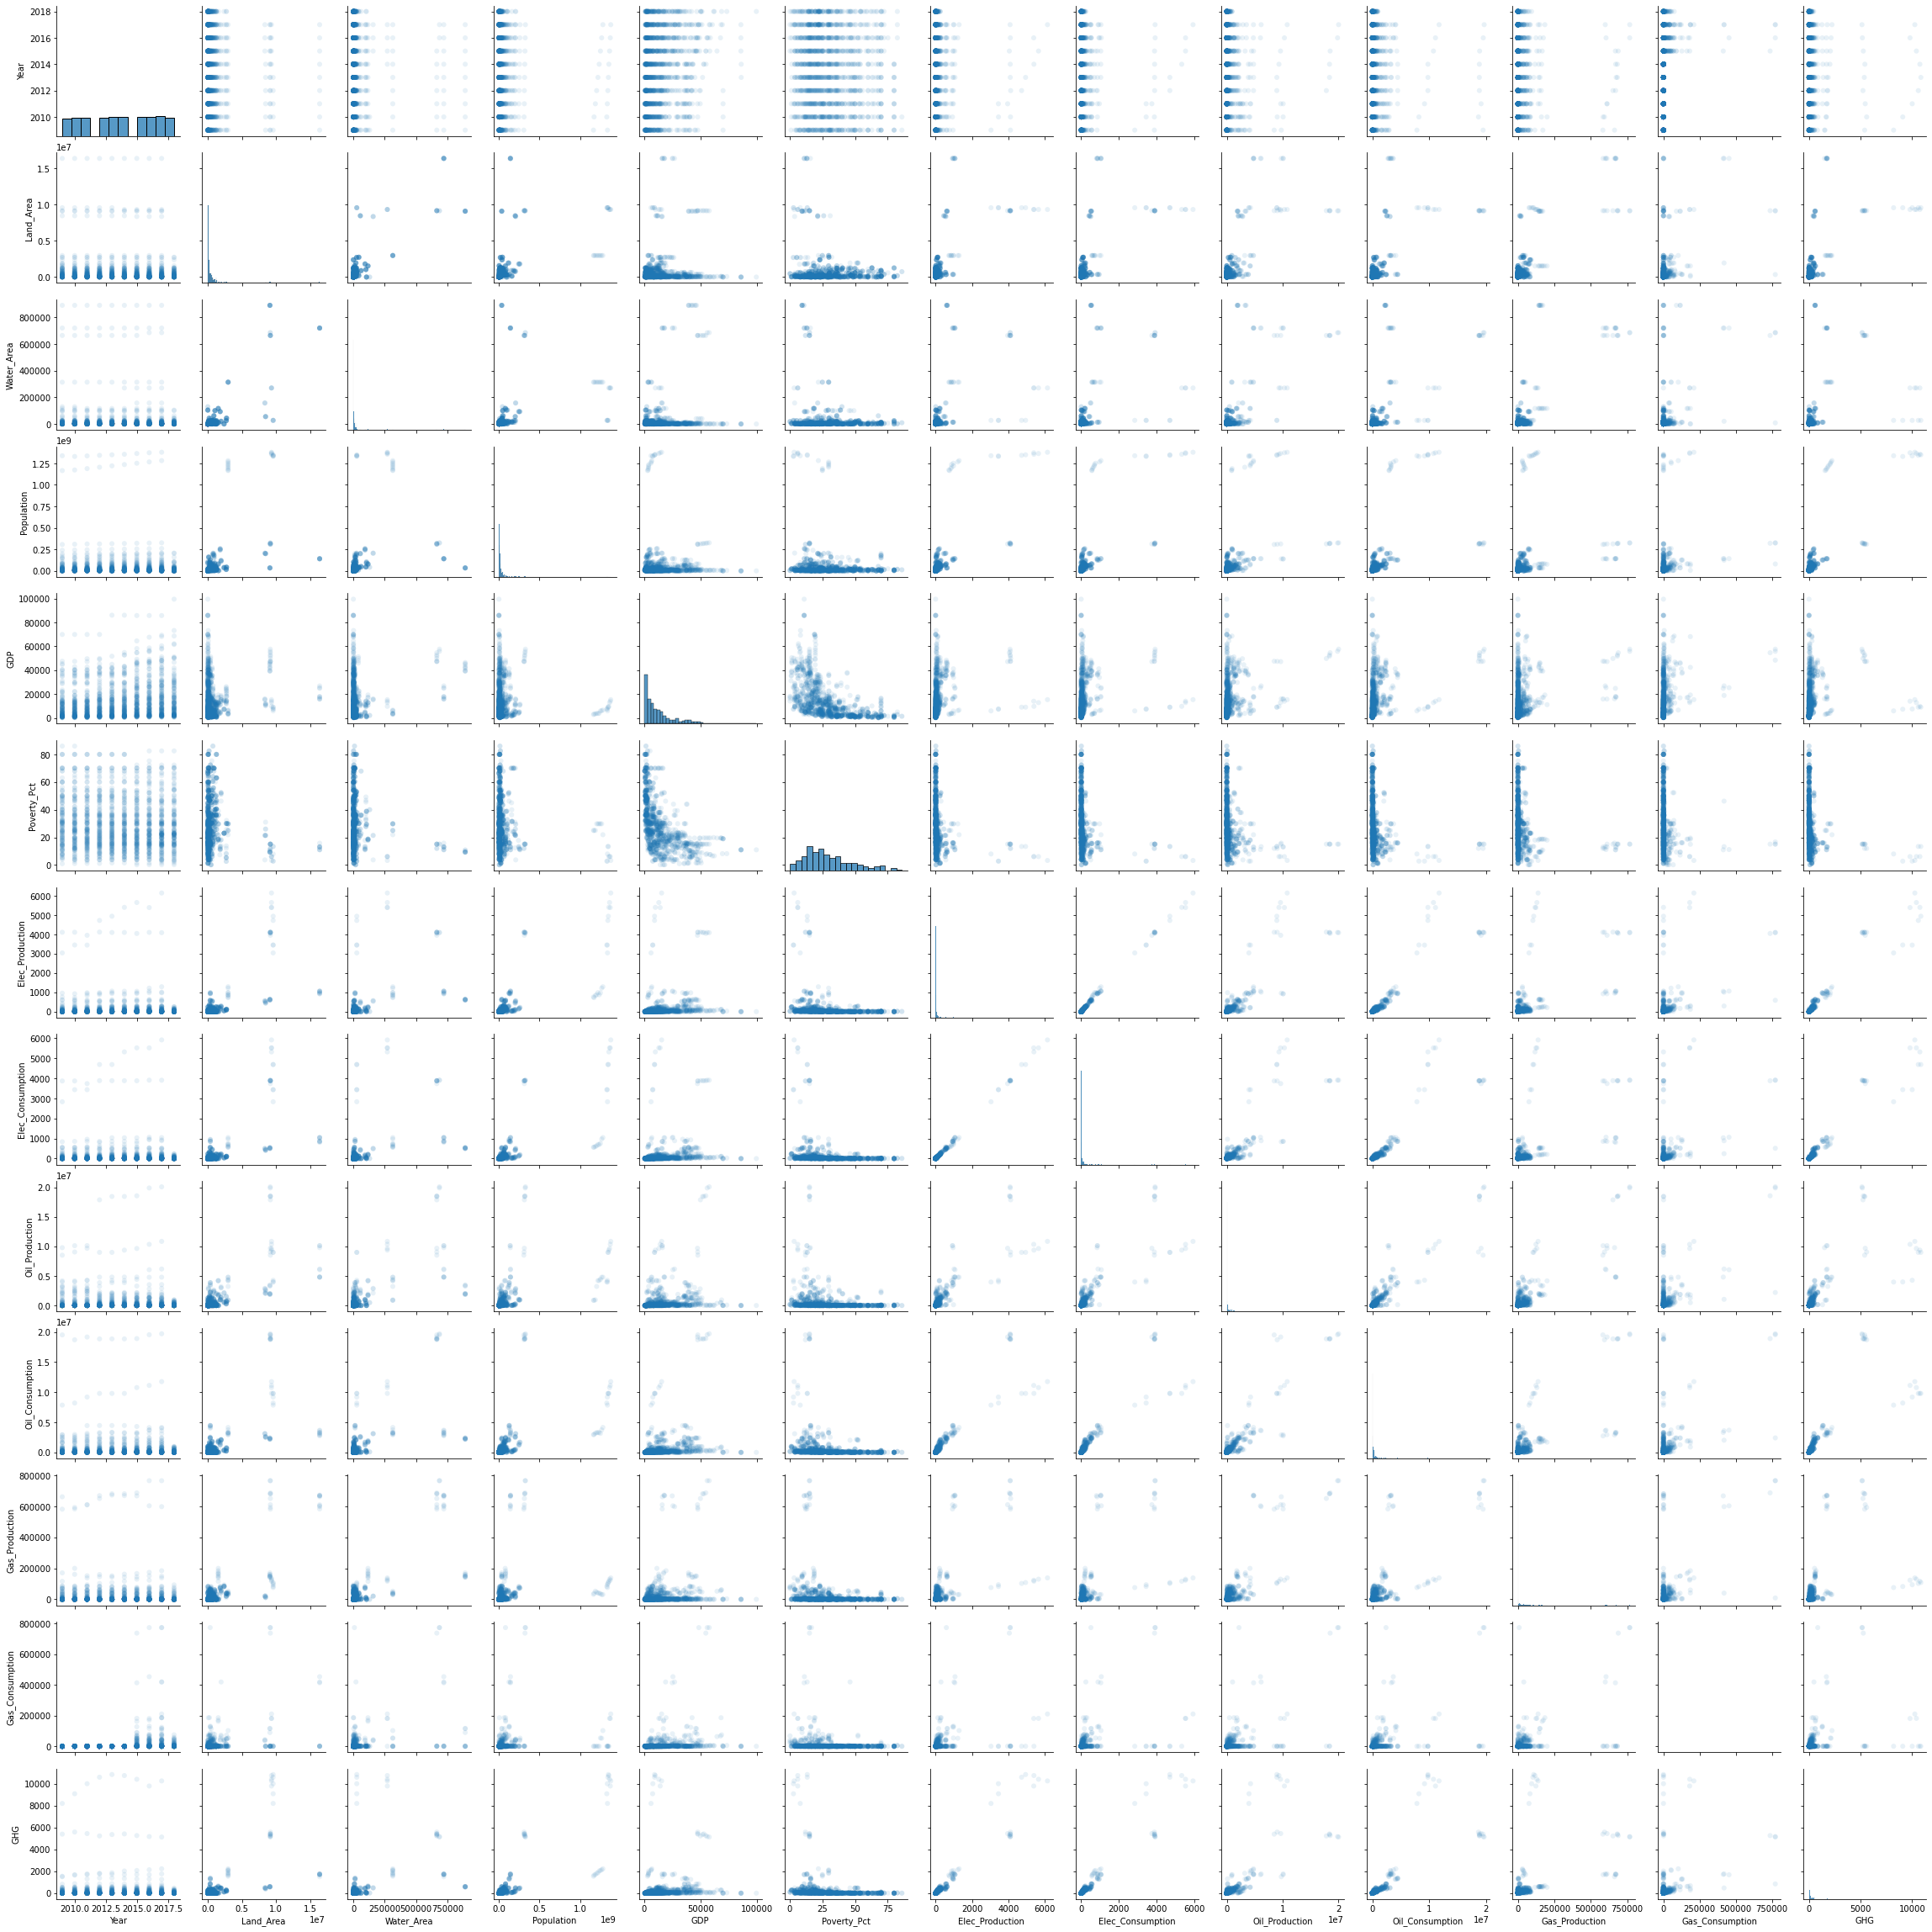

In [352]:
# generate visuals to better understand the target and feature-target relationships
import seaborn as sns
sns.pairplot(dfg.drop('Country', axis=1), plot_kws=dict(alpha=.1, edgecolor='none'));

In [353]:
# the pair plots show a definite linear relationship between Electricity Production & Consumption
# do some feature engineering or use Ridge or Lasso to account for this

In [434]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import Lasso, LinearRegression, Ridge, RidgeCV, ElasticNet #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [557]:
X_orig, y_orig = dfg.drop(['Country', 'GHG'], axis=1), dfg['GHG']

# hold out 20% of the data for final testing
X, X_test, y, y_test = train_test_split(X_orig, y_orig, test_size = 0.2, random_state = 42)

In [558]:
# now divide the 80% into 60% and 20% of original df
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, random_state = 43)

In [627]:
#set up the 3 models we're choosing from:

lm = LinearRegression()

#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lm_reg = Ridge(alpha=1)

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()
lm_poly.fit(X_train_poly, y_train)
y_pred = lm_poly.predict(poly.transform(X_val))
print("Polynomial Regression:", r2_score(y_val, y_pred))

Polynomial Regression: 0.8321197822862334


In [630]:
#validate

lm.fit(X_train, y_train)
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression val R^2: {lm_reg.score(X_val_scaled, y_val):.3f}')

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')

Linear Regression val R^2: 0.948
Ridge Regression val R^2: 0.954
Degree 2 polynomial regression val R^2: 0.832


In [631]:
# test
lm.fit(X_val, y_val)
print(f'Linear Regression test R^2: {lm.score(X_test, y_test):.3f}')

Linear Regression test R^2: 0.957


In [632]:
X_scaled = scaler.fit_transform(X)
lm_reg.fit(X_val_scaled, y_val)
print(f'Ridge Regression test R^2: {lm_reg.score(X_test_scaled, y_test):.3f}')

Ridge Regression test R^2: 0.958


In [633]:
kfold = KFold(n_splits=5, shuffle=True, random_state = 1000)

print(f"Linear Regression cross validation R^2:  {np.mean(cross_val_score(lm, X, y, cv=kfold, scoring='r2'))}")
print(f"Ridge Regression cross validation R^2:  {np.mean(cross_val_score(lm_reg, X_scaled, y, cv=kfold, scoring='r2'))}")

Linear Regression cross validation R^2:  0.9405250447811502
Ridge Regression cross validation R^2:  0.9405995192756624


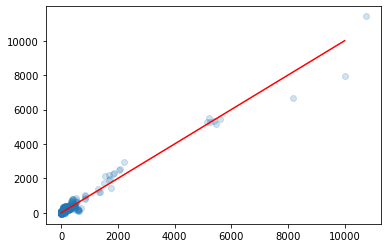

In [565]:
# Linear Regression Fitted vs. Actual
y_train_pred = lm.predict(X_train)

plt.scatter(y_train, y_train_pred, alpha=0.2)
plt.plot([0, 10000], [0, 10000], color='red');

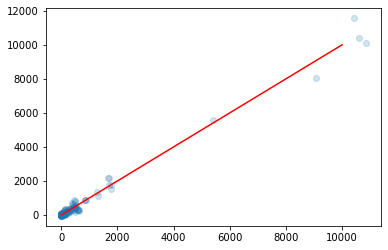

In [566]:
# Fitted vs. Actual
y_test_pred = lm.predict(X_test)

plt.scatter(y_test, y_test_pred, alpha=0.2)
plt.plot([0, 10000], [0, 10000], color='red');

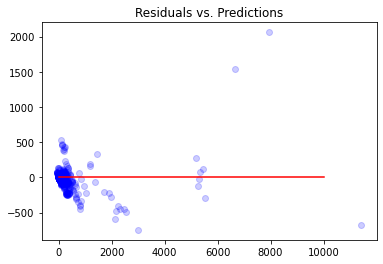

In [567]:
# Plot Residuals vs. predicted

lm_residuals = y_train - y_train_pred

plt.scatter(y_train_pred, lm_residuals, color='blue', marker='o', alpha=0.2)
plt.plot([0,10000], [0, 0], color='red')
plt.title("Residuals vs. Predictions");

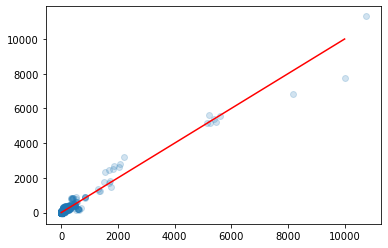

In [568]:
# Ridge Regression Train Fitted vs. Actual
y_train_pred = lm_reg.predict(X_train_scaled)

plt.scatter(y_train, y_train_pred, alpha=0.2)
plt.plot([0, 10000], [0, 10000], color='red');

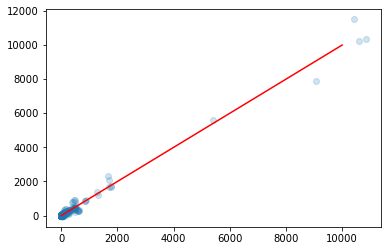

In [569]:
# Ridge Test Fitted vs. Actual
y_test_pred = lm_reg.predict(X_test_scaled)

plt.scatter(y_test, y_test_pred, alpha=0.2)
plt.plot([0, 10000], [0, 10000], color='red');

Text(0.5, 1.0, 'Ridge Residuals vs. Predictions')

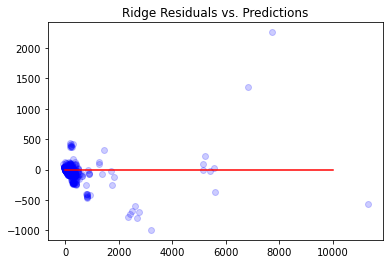

In [570]:
# Plot Ridge Residuals vs. predicted
# doesn't look great

lm_reg_residuals = y_train - y_train_pred

plt.scatter(y_train_pred, lm_reg_residuals, color='blue', marker='o', alpha=0.2)
plt.plot([0,10000], [0, 0], color='red')
plt.title("Ridge Residuals vs. Predictions")

Lasso Model:


/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3381507.800599019, tolerance: 32402.05612300706
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5708639.172248383, tolerance: 45604.2510349913
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2984274.5579972244, tolerance: 27689.163276002157
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5603180.339057511, tolerance: 47449.24913395948
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5789214.279763105, tolerance: 42389.21334006531
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3284450.340037398, tolerance: 32402.05612300706
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5037091.897090741, tolerance: 42389.21334006531
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 405560.3817769401, tolerance: 32402.05612300706
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4640446.985846462, tolerance: 45604.2510349913
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/s

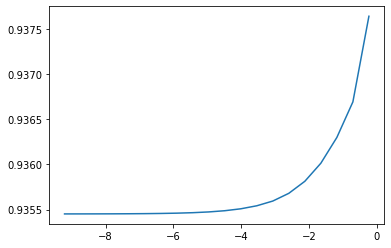

In [608]:
print("Lasso Model:")
params = {
    "alpha": np.logspace(-4, -.1, 20)
}

grid_est = GridSearchCV(Lasso(), param_grid=params, cv=kfold, 
                        return_train_score=False)
grid_est.fit(X_train_scaled, y_train)
df = pd.DataFrame(grid_est.cv_results_)
df["alpha"] = df.params.apply(lambda val: val["alpha"])
plt.plot(np.log(df.alpha), df.mean_test_score);

Ridge Model:


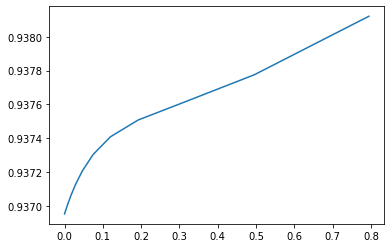

In [571]:
print("Ridge Model:")
params = {
    "alpha": np.logspace(-4, -.1, 20)
}

grid_est = GridSearchCV(Ridge(), param_grid=params, cv=kfold, 
                        return_train_score=False)
grid_est.fit(X_train_scaled, y_train)
df = pd.DataFrame(grid_est.cv_results_)
df["alpha"] = df.params.apply(lambda val: val["alpha"])
plt.plot((df.alpha), df.mean_test_score);

In [609]:
grid_est.best_estimator_

Lasso(alpha=0.7943282347242815)

In [572]:
def build_grid_search_est(model, X, y, cv=5, **params):

    grid_est = GridSearchCV(model, param_grid=params, cv=kfold, 
                            return_train_score=False)
    grid_est.fit(X, y)
    df = pd.DataFrame(grid_est.cv_results_)
    for param in params:
        df[param] = df.params.apply(lambda val: val[param])
#       plt.plot(np.log(df.alpha), df.mean_test_score);
        plt.semilogx(df.alpha, df.mean_test_score)
    return grid_est

Ridge Grid Search


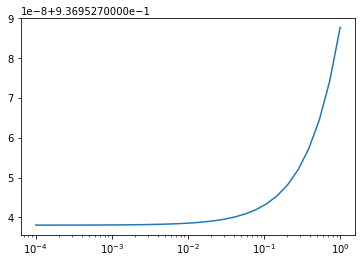

In [614]:
print("Ridge Grid Search")
ridge_grid_est = build_grid_search_est(Ridge(), X_train, y_train, cv=kfold,
                                       alpha=np.logspace(-4, 0, 30))

Lasso Grid Search


/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3385166.578628272, tolerance: 32402.05612300706
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5710033.457918067, tolerance: 45604.2510349913
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2984975.5193203096, tolerance: 27689.163276002157
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5710035.943120433, tolerance: 45604.2510349913
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2984977.549277201, tolerance: 27689.163276002157
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5625301.802610926, tolerance: 47449.24913395948
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2984995.508212974, tolerance: 27689.163276002157
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5625316.970798867, tolerance: 47449.24913395948
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5817843.8416484045, tolerance: 42389.21334006531
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3385335.0777848274, tolerance: 32402.05612300706
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5710302.497271778, tolerance: 45604.2510349913
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2985195.26963937, tolerance: 27689.163276002157
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/

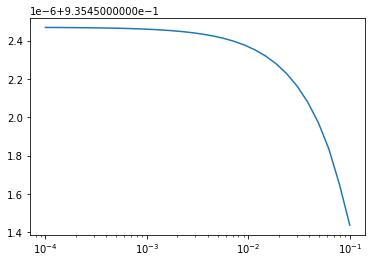

In [615]:
print("Lasso Grid Search")
lasso_grid_est = build_grid_search_est(Lasso(), X_train, y_train, cv=kfold,
                                       alpha=np.logspace(-4, -1, 30))

Elastic Net Grid Search


/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3385166.4629999665, tolerance: 32402.05612300706
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5710033.566900132, tolerance: 45604.2510349913
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2984975.774718298, tolerance: 27689.163276002157
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5710033.534205844, tolerance: 45604.2510349913
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2984975.698098918, tolerance: 27689.163276002157
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5625300.0931309955, tolerance: 47449.24913395948
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5625300.090727235, tolerance: 47449.24913395948
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5817821.015600656, tolerance: 42389.21334006531
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3385166.540085553, tolerance: 32402.05612300706
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5817821.009022977, tolerance: 42389.21334006531
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3385166.559356925, tolerance: 32402.05612300706
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5710033.47608198, tolerance: 45604.2510349913
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/si

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3385166.5445341608, tolerance: 32402.05612300706
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5710033.755789283, tolerance: 45604.2510349913
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2984975.9623063495, tolerance: 27689.163276002157
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5710033.705484869, tolerance: 45604.2510349913
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2984975.8444167734, tolerance: 27689.163276002157
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5625300.208675906, tolerance: 47449.24913395948
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5625300.20568008, tolerance: 47449.24913395948
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5817821.169822476, tolerance: 42389.21334006531
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3385166.6512805778, tolerance: 32402.05612300706
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2984976.285554408, tolerance: 27689.163276002157
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5625300.375414331, tolerance: 47449.24913395948
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5817821.441123437, tolerance: 42389.21334006531
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3385166.702610111, tolerance: 32402.05612300706
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5710033.974785537, tolerance: 45604.2510349913
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2984976.122303746, tolerance: 27689.163276002157
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2984976.040678359, tolerance: 27689.163276002157
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5625300.36849992, tolerance: 47449.24913395948
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5817821.403284642, tolerance: 42389.21334006531
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5625300.366195076, tolerance: 47449.24913395948
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5817821.390671662, tolerance: 42389.21334006531
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3385166.783911266, tolerance: 32402.05612300706
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3385166.8208662276, tolerance: 32402.05612300706
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5710033.863328781, tolerance: 45604.2510349913
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2984975.861102347, tolerance: 27689.163276002157
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2984976.6942485864, tolerance: 27689.163276002157
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5625300.600600459, tolerance: 47449.24913395948
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5817821.762868121, tolerance: 42389.21334006531
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5817821.745402246, tolerance: 42389.21334006531
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3385166.8242852897, tolerance: 32402.05612300706
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5710034.369676922, tolerance: 45604.2510349913
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5710034.3214464765, tolerance: 45604.2510349913
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2984976.4455763446, tolerance: 27689.163276002157
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5625300.593578709, tolerance: 47449.24913395948
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5710034.234630387, tolerance: 45604.2510349913
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2984976.2421168685, tolerance: 27689.163276002157
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5625300.587833619, tolerance: 47449.24913395948
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3385166.910095233, tolerance: 32402.05612300706
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5710034.994426947, tolerance: 45604.2510349913
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2984977.345414441, tolerance: 27689.163276002157
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3385167.023481138, tolerance: 32402.05612300706
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5710034.887570317, tolerance: 45604.2510349913
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2984977.094974285, tolerance: 27689.163276002157
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5817822.144182847, tolerance: 42389.21334006531
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3385167.151039822, tolerance: 32402.05612300706
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5710034.767353802, tolerance: 45604.2510349913
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/s

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5625300.8927388955, tolerance: 47449.24913395948
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5817822.100647709, tolerance: 42389.21334006531
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3385167.278598029, tolerance: 32402.05612300706
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2984978.011120503, tolerance: 27689.163276002157
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5625301.343321344, tolerance: 47449.24913395948
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5817822.820318048, tolerance: 42389.21334006531
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5625301.337200593, tolerance: 47449.24913395948
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5817822.786826295, tolerance: 42389.21334006531
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3385167.3385732477, tolerance: 32402.05612300706
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3385167.4367075274, tolerance: 32402.05612300706
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5710035.475255683, tolerance: 45604.2510349913
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2984977.5342645613, tolerance: 27689.163276002157
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2984977.3175113713, tolerance: 27689.163276002157
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5625301.323735106, tolerance: 47449.24913395948
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5817822.713144168, tolerance: 42389.21334006531
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5817822.679652226, tolerance: 42389.21334006531
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3385167.652601995, tolerance: 32402.05612300706
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5710035.271790142, tolerance: 45604.2510349913
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/s

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5710036.777096049, tolerance: 45604.2510349913
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2984979.2864662623, tolerance: 27689.163276002157
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5625301.946653872, tolerance: 47449.24913395948
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5625301.938177655, tolerance: 47449.24913395948
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5817823.657675314, tolerance: 42389.21334006531
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3385167.6541084894, tolerance: 32402.05612300706
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5817823.564919992, tolerance: 42389.21334006531
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3385167.925899834, tolerance: 32402.05612300706
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5710036.367312364, tolerance: 45604.2510349913
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/s

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5710036.239247813, tolerance: 45604.2510349913
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2984978.0258167535, tolerance: 27689.163276002157
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5625301.911054233, tolerance: 47449.24913395948
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2984977.725660374, tolerance: 27689.163276002157
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5625301.902578331, tolerance: 47449.24913395948
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5817823.462888668, tolerance: 42389.21334006531
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5625302.774696264, tolerance: 47449.24913395948
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5817824.887144516, tolerance: 42389.21334006531
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3385168.0220271354, tolerance: 32402.05612300706
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3385168.2102166186, tolerance: 32402.05612300706
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5710037.97300156, tolerance: 45604.2510349913
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2984980.290534769, tolerance: 27689.163276002157
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5710037.795682386, tolerance: 45604.2510349913
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2984979.874886989, tolerance: 27689.163276002157
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5625302.748872272, tolerance: 47449.24913395948
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5817824.63026156, tolerance: 42389.21334006531
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3385168.7747791647, tolerance: 32402.05612300706
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5710037.441024667, tolerance: 45604.2510349913
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/s

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5817826.538284348, tolerance: 42389.21334006531
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3385168.6820354657, tolerance: 32402.05612300706
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5710040.12277937, tolerance: 45604.2510349913
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/s

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3385168.9426424396, tolerance: 32402.05612300706
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5710039.8772695605, tolerance: 45604.2510349913
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2984982.2628424466, tolerance: 27689.163276002157
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5817826.271502137, tolerance: 42389.21334006531
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3385169.463850943, tolerance: 32402.05612300706
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5710039.386212538, tolerance: 45604.2510349913
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/s

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5625303.842409822, tolerance: 47449.24913395948
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5817826.0936453715, tolerance: 42389.21334006531
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3385169.2350516394, tolerance: 32402.05612300706
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5817828.726192739, tolerance: 42389.21334006531
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3385169.8846672075, tolerance: 32402.05612300706
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5710042.582144381, tolerance: 45604.2510349913
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5817828.479917709, tolerance: 42389.21334006531
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3385170.60644885, tolerance: 32402.05612300706
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5710041.902238943, tolerance: 45604.2510349913
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/si

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2984982.762269151, tolerance: 27689.163276002157
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5625305.424715787, tolerance: 47449.24913395948
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5817828.332151257, tolerance: 42389.21334006531
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2984990.100594029, tolerance: 27689.163276002157
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5625307.71802208, tolerance: 47449.24913395948
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5817831.990800042, tolerance: 42389.21334006531
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5710045.788952725, tolerance: 45604.2510349913
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2984987.8931045327, tolerance: 27689.163276002157
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5625307.65566182, tolerance: 47449.24913395948
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2984986.7893463075, tolerance: 27689.163276002157
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5625307.624483064, tolerance: 47449.24913395948
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5817831.479288548, tolerance: 42389.21334006531
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5625307.5808340255, tolerance: 47449.24913395948
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5817831.240578893, tolerance: 42389.21334006531
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3385173.060426536, tolerance: 32402.05612300706
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5710051.742578192, tolerance: 45604.2510349913
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2984995.236142598, tolerance: 27689.163276002157
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5625310.751700413, tolerance: 47449.24913395948
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5625310.708514289, tolerance: 47449.24913395948
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5817836.044473885, tolerance: 42389.21334006531
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3385173.582637019, tolerance: 32402.05612300706
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5817835.8083895845, tolerance: 42389.21334006531
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3385174.274756684, tolerance: 32402.05612300706
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5710050.3091438655, tolerance: 45604.2510349913
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5625310.5789657915, tolerance: 47449.24913395948
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5817835.336213024, tolerance: 42389.21334006531
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3385175.6589571205, tolerance: 32402.05612300706
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5817842.641937307, tolerance: 42389.21334006531
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3385174.46460167, tolerance: 32402.05612300706
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5710059.6647778815, tolerance: 45604.2510349913
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/s

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3385175.4231653498, tolerance: 32402.05612300706
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5710058.763093161, tolerance: 45604.2510349913
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2985002.5357189127, tolerance: 27689.163276002157
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2984998.302503133, tolerance: 27689.163276002157
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5625314.838217258, tolerance: 47449.24913395948
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5817841.595955625, tolerance: 42389.21334006531
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5710055.154670057, tolerance: 45604.2510349913
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2984994.0691549643, tolerance: 27689.163276002157
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5625314.718595137, tolerance: 47449.24913395948
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5710069.163047713, tolerance: 45604.2510349913
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2985014.239583852, tolerance: 27689.163276002157
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5625320.827304168, tolerance: 47449.24913395948
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3385181.0537500703, tolerance: 32402.05612300706
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5710066.666650357, tolerance: 45604.2510349913
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2985008.3774624444, tolerance: 27689.163276002157
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5710065.417967471, tolerance: 45604.2510349913
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2985005.4463064536, tolerance: 27689.163276002157
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5625320.578715195, tolerance: 47449.24913395948
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2985002.5150870425, tolerance: 27689.163276002157
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5625320.4958638, tolerance: 47449.24913395948
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5817848.95129342, tolerance: 42389.21334006531
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/s

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5710083.4073361745, tolerance: 45604.2510349913
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2985030.0859640655, tolerance: 27689.163276002157
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5625328.944575311, tolerance: 47449.24913395948
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2985022.7798991785, tolerance: 27689.163276002157
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5625328.737911529, tolerance: 47449.24913395948
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5817861.364013259, tolerance: 42389.21334006531
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3385188.196981961, tolerance: 32402.05612300706
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5710078.225313263, tolerance: 45604.2510349913
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2985017.9089698927, tolerance: 27689.163276002157
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2985013.8497280506, tolerance: 27689.163276002157
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5625328.485371502, tolerance: 47449.24913395948
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5817859.985673013, tolerance: 42389.21334006531
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3385186.9388354593, tolerance: 32402.05612300706
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5710104.690455144, tolerance: 45604.2510349913
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2985055.713932875, tolerance: 27689.163276002157
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2985050.093340152, tolerance: 27689.163276002157
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5625340.129581851, tolerance: 47449.24913395948
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5817878.434579057, tolerance: 42389.21334006531
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5817877.5674107885, tolerance: 42389.21334006531
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3385192.5420585484, tolerance: 32402.05612300706
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5710099.436567428, tolerance: 45604.2510349913
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3385195.0886991885, tolerance: 32402.05612300706
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5710097.046543715, tolerance: 45604.2510349913
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2985037.727213488, tolerance: 27689.163276002157
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3385200.181456776, tolerance: 32402.05612300706
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5710092.2629418345, tolerance: 45604.2510349913
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2985026.4842977473, tolerance: 27689.163276002157
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5625355.648522653, tolerance: 47449.24913395948
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5817900.681683569, tolerance: 42389.21334006531
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3385199.100769643, tolerance: 32402.05612300706
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5625355.207451026, tolerance: 47449.24913395948
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5817898.2813321045, tolerance: 42389.21334006531
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3385206.1564418757, tolerance: 32402.05612300706
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5817896.120782298, tolerance: 42389.21334006531
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3385212.5054058433, tolerance: 32402.05612300706
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5710115.712304357, tolerance: 45604.2510349913
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5625377.196921682, tolerance: 47449.24913395948
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5817931.813881583, tolerance: 42389.21334006531
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3385210.723732723, tolerance: 32402.05612300706
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5817928.824745972, tolerance: 42389.21334006531
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3385219.5216413857, tolerance: 32402.05612300706
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5710157.577499224, tolerance: 45604.2510349913
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5817925.502991205, tolerance: 42389.21334006531
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3385229.294675789, tolerance: 32402.05612300706
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5710148.430754511, tolerance: 45604.2510349913
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/s

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5817975.038054822, tolerance: 42389.21334006531
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3385226.4245604295, tolerance: 32402.05612300706
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5710218.052902713, tolerance: 45604.2510349913
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3385239.970502754, tolerance: 32402.05612300706
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5710205.44702995, tolerance: 45604.2510349913
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2985147.2478034813, tolerance: 27689.163276002157
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5817965.8488009805, tolerance: 42389.21334006531
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3385253.5115908706, tolerance: 32402.05612300706
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5710192.8080352275, tolerance: 45604.2510349913
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5818034.406859224, tolerance: 42389.21334006531
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3385249.4877417325, tolerance: 32402.05612300706
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5710289.071617088, tolerance: 45604.2510349913
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3385266.3858064795, tolerance: 32402.05612300706
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5710273.426172279, tolerance: 45604.2510349913
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2985217.5804066984, tolerance: 27689.163276002157
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5625446.185183942, tolerance: 47449.24913395948
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5818022.971448393, tolerance: 42389.21334006531
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3385283.2763996576, tolerance: 32402.05612300706
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3385292.6568182567, tolerance: 32402.05612300706
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5710248.987042029, tolerance: 45604.2510349913
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2985159.669295337, tolerance: 27689.163276002157
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5625504.916553054, tolerance: 47449.24913395948
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5818113.934500552, tolerance: 42389.21334006531
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3385289.173872565, tolerance: 32402.05612300706
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2985299.369100081, tolerance: 27689.163276002157
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5625503.442839392, tolerance: 47449.24913395948
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5818106.033286487, tolerance: 42389.21334006531
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3385336.009219056, tolerance: 32402.05612300706
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5710336.833072953, tolerance: 45604.2510349913
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2985242.070925977, tolerance: 27689.163276002157
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5710522.91505103, tolerance: 45604.2510349913
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2985511.312747841, tolerance: 27689.163276002157
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5625584.21511672, tolerance: 47449.24913395948
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/si

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2985431.987397128, tolerance: 27689.163276002157
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5625581.935448306, tolerance: 47449.24913395948
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5818216.909295228, tolerance: 42389.21334006531
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5818210.845837083, tolerance: 42389.21334006531
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3385383.1426774664, tolerance: 32402.05612300706
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5710470.154402994, tolerance: 45604.2510349913
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2985344.806927699, tolerance: 27689.163276002157
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5625579.432291837, tolerance: 47449.24913395948
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5818203.567574804, tolerance: 42389.21334006531
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5818392.48509863, tolerance: 42389.21334006531
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3385371.066006264, tolerance: 32402.05612300706
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5710723.636616569, tolerance: 45604.2510349913
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/si

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3385416.193728713, tolerance: 32402.05612300706
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5710683.188101776, tolerance: 45604.2510349913
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2985651.609814653, tolerance: 27689.163276002157
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2985552.824113962, tolerance: 27689.163276002157
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5625688.729658471, tolerance: 47449.24913395948
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5818360.712502392, tolerance: 42389.21334006531
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5625685.877374202, tolerance: 47449.24913395948
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5818345.647621489, tolerance: 42389.21334006531
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3385511.2989604436, tolerance: 32402.05612300706
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3385497.6477683336, tolerance: 32402.05612300706
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5710943.90998783, tolerance: 45604.2510349913
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2985942.1455507553, tolerance: 27689.163276002157
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5818572.589189564, tolerance: 42389.21334006531
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3385567.226149113, tolerance: 32402.05612300706
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5710882.043942695, tolerance: 45604.2510349913
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/s

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5710825.663390242, tolerance: 45604.2510349913
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2985652.98723768, tolerance: 27689.163276002157
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5625834.473392126, tolerance: 47449.24913395948
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/s

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2986334.9664834556, tolerance: 27689.163276002157
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5626051.895643382, tolerance: 47449.24913395948
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5818892.515914657, tolerance: 42389.21334006531
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2986124.268152785, tolerance: 27689.163276002157
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5626045.657136644, tolerance: 47449.24913395948
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5818860.830379388, tolerance: 42389.21334006531
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3385768.6192485583, tolerance: 32402.05612300706
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5711163.951109598, tolerance: 45604.2510349913
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2985997.559610748, tolerance: 27689.163276002157
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2985891.874696958, tolerance: 27689.163276002157
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5626038.820882815, tolerance: 47449.24913395948
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5818825.934787211, tolerance: 42389.21334006531
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5819319.824283855, tolerance: 42389.21334006531
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3385742.654558804, tolerance: 32402.05612300706
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5711812.431076239, tolerance: 45604.2510349913
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/s

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5819276.376963337, tolerance: 42389.21334006531
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3385877.4772403734, tolerance: 32402.05612300706
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5711699.894386278, tolerance: 45604.2510349913
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3385944.7469317312, tolerance: 32402.05612300706
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5711642.580257065, tolerance: 45604.2510349913
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2986506.9076745994, tolerance: 27689.163276002157
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5711584.548594983, tolerance: 45604.2510349913
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2986360.4237469174, tolerance: 27689.163276002157
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5626325.202851532, tolerance: 47449.24913395948
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5626743.3548496505, tolerance: 47449.24913395948
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5819891.673240944, tolerance: 42389.21334006531
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3385958.382121883, tolerance: 32402.05612300706
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5626730.802120824, tolerance: 47449.24913395948
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5819832.242980395, tolerance: 42389.21334006531
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3386146.4363288158, tolerance: 32402.05612300706
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5712192.18652385, tolerance: 45604.2510349913
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2986931.782105466, tolerance: 27689.163276002157
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5626718.301142528, tolerance: 47449.24913395948
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/s

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2986728.2999125123, tolerance: 27689.163276002157
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5626712.072398098, tolerance: 47449.24913395948
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5819742.929703217, tolerance: 42389.21334006531
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5713317.356859158, tolerance: 45604.2510349913
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2988525.1571249045, tolerance: 27689.163276002157
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5627286.0542160785, tolerance: 47449.24913395948
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2988244.192842707, tolerance: 27689.163276002157
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5627277.034281572, tolerance: 47449.24913395948
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5820598.228694065, tolerance: 42389.21334006531
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5627259.03598852, tolerance: 47449.24913395948
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5820517.092651802, tolerance: 42389.21334006531
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3386776.4524598042, tolerance: 32402.05612300706
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5628055.979119994, tolerance: 47449.24913395948
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5821762.033555939, tolerance: 42389.21334006531
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3386649.219872159, tolerance: 32402.05612300706
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3386833.4588900693, tolerance: 32402.05612300706
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5714511.133755095, tolerance: 45604.2510349913
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2989808.2685317677, tolerance: 27689.163276002157
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5714248.749247946, tolerance: 45604.2510349913
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2989027.656866718, tolerance: 27689.163276002157
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5628013.8375925915, tolerance: 47449.24913395948
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5821497.747851579, tolerance: 42389.21334006531
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3387529.4061053074, tolerance: 32402.05612300706
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5713998.188836392, tolerance: 45604.2510349913
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5823202.805448438, tolerance: 42389.21334006531
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3387338.0902073146, tolerance: 32402.05612300706
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5716220.013709531, tolerance: 45604.2510349913
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2991010.1165580507, tolerance: 27689.163276002157
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5629057.051864062, tolerance: 47449.24913395948
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5823068.689857842, tolerance: 42389.21334006531
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.

/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5629025.413020892, tolerance: 47449.24913395948
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5822949.507093317, tolerance: 42389.21334006531
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3388212.958205197, tolerance: 32402.05612300706
  model = cd_fast.enet_coordinate_descent(
/home/melissa/anaconda3/envs/metis/lib/python3.8/

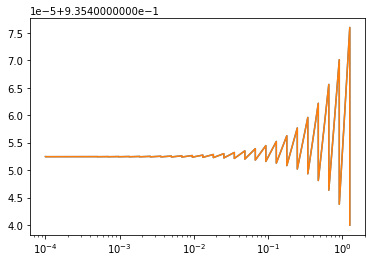

In [616]:
print("Elastic Net Grid Search")
elastic_net_grid_est = build_grid_search_est(ElasticNet(), X_train, y_train, cv=kfold,
                                             alpha=np.logspace(-4, 0.1, 30),
                                             l1_ratio=np.linspace(0,1,30,endpoint=False))

In [618]:
# Model on test data shows Ridge is a good choice
from sklearn.metrics import r2_score, mean_squared_error

y_pred = lm.predict(X_test)
print("Linear Regression:", r2_score(y_test, y_pred))

y_pred = lasso_grid_est.predict(X_test)
print("Lasso Regression:", r2_score(y_test, y_pred))

y_pred = ridge_grid_est.predict(X_test)
print("Ridge Regression:", r2_score(y_test, y_pred))

y_pred = elastic_net_grid_est.predict(X_test)
print("ElasticNet Regression:", r2_score(y_test, y_pred))

Linear Regression: 0.9881596562644314
Lasso Regression: 0.9847916017294059
Ridge Regression: 0.985443752227319
ElasticNet Regression: 0.9847916019742845


In [619]:
# try the LARS path to study feature importance
from sklearn import linear_model
from sklearn.linear_model import lars_path
from sklearn.metrics import mean_absolute_error as mae

In [620]:
## Scale the variables
std = StandardScaler()
std.fit(X_train.values)

StandardScaler()

In [621]:
X_tr = std.transform(X_train.values)
print(X_tr.T.shape)
y_train.values.shape

(12, 834)


(834,)

In [622]:
## Note: lars_path takes numpy matrices, not pandas dataframes

print("Computing regularization path using the LARS ...")
alphas, _, coefs = lars_path(X=X_tr, y=y_train.values, method='lasso')

Computing regularization path using the LARS ...


In [623]:
import matplotlib.pyplot as plt

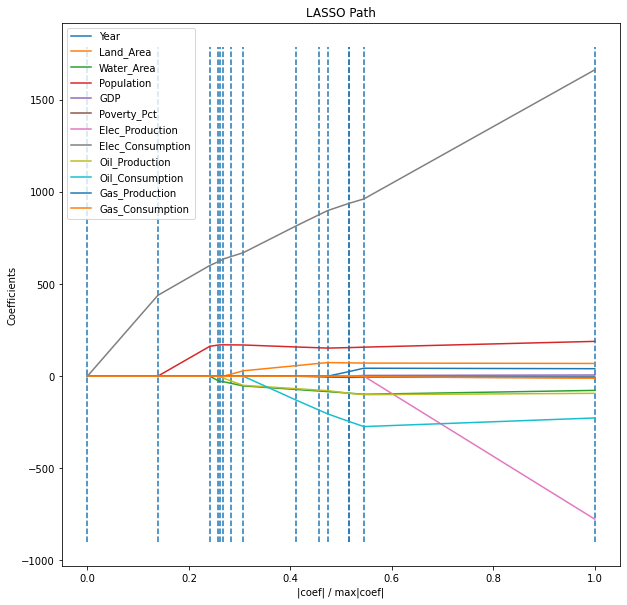

In [624]:
# plotting the LARS path

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.figure(figsize=(10,10))
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.legend(X_train.columns)
plt.show()

In [625]:
# above plot uses LASSO to find feature importance; try Ridge
print("Computing regularization path using the LARS ...")
alphas, _, coefs = lars_path(X=X_tr, y=y_train.values, method='ridge')

Computing regularization path using the LARS ...


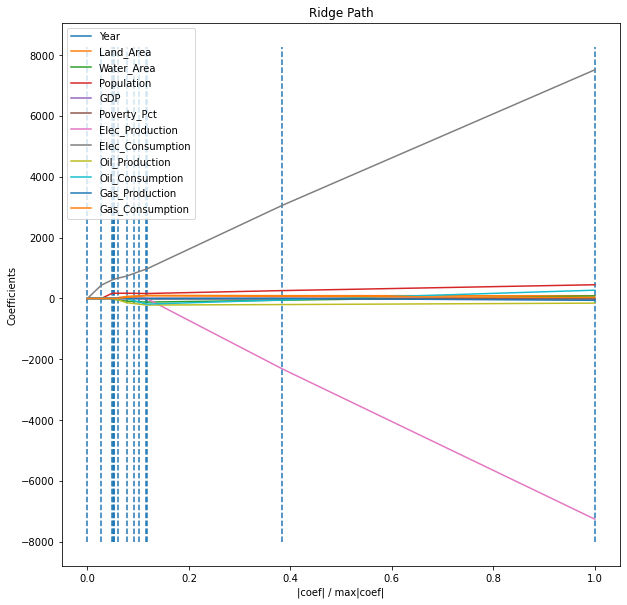

In [626]:
# plotting the LARS path

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.figure(figsize=(10,10))
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('Ridge Path')
plt.axis('tight')
plt.legend(X_train.columns)
plt.show()

In [583]:
def split_and_validate_ridge(X, y, alpha):
    '''
    Perform a 80/20 train/val split, then fit and validate a Ridge linear regression model.
    Inputs: features, target, regularization parameter
    Outputs: model results
    '''
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)
    
    scaler = StandardScaler()  # scale data
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    model = Ridge(alpha)
    model.fit(X_train_scaled, y_train)
    
    # score fit model on validation data
    val_score = model.score(X_val_scaled, y_val)
    
    # score training data
    train_score = model.score(X_train_scaled, y_train)
    
    # report results
    print('Train R^2 score:', train_score)
    print('Validation R^2 score:', val_score)

In [584]:
# examine results using different alphas
for alpha in 10**np.linspace(-2,2,50):
    print(f"\nalpha: {alpha}")
    split_and_validate_ridge(X, y, alpha)


alpha: 0.01
Train R^2 score: 0.9799200702832566
Validation R^2 score: 0.9426377964011846

alpha: 0.012067926406393288
Train R^2 score: 0.9799195107913562
Validation R^2 score: 0.9426809892512966

alpha: 0.014563484775012436
Train R^2 score: 0.9799187087611524
Validation R^2 score: 0.9427323987322468

alpha: 0.017575106248547922
Train R^2 score: 0.9799175626785583
Validation R^2 score: 0.9427934195119202

alpha: 0.021209508879201904
Train R^2 score: 0.9799159311037782
Validation R^2 score: 0.9428656112086098

alpha: 0.025595479226995357
Train R^2 score: 0.9799136187392075
Validation R^2 score: 0.9429506866991577

alpha: 0.030888435964774818
Train R^2 score: 0.9799103588310613
Validation R^2 score: 0.9430504838891998

alpha: 0.0372759372031494
Train R^2 score: 0.9799057917447184
Validation R^2 score: 0.9431669150680138

alpha: 0.04498432668969444
Train R^2 score: 0.9798994401660389
Validation R^2 score: 0.9433018876199843

alpha: 0.054286754393238594
Train R^2 score: 0.9798906824334381


In [585]:
# alpha = 4.576 looks best, let's see if RidgeCV agrees
# Run the cross validation, find the best alpha, refit the model on all the data with that alpha

alphavec = 10**np.linspace(-4, 2, 1000)

ridge_model = RidgeCV(alphas = alphavec, cv=5)
ridge_model.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([1.00000000e-04, 1.01392541e-04, 1.02804473e-04, 1.04236067e-04,
       1.05687597e-04, 1.07159340e-04, 1.08651577e-04, 1.10164595e-04,
       1.11698682e-04, 1.13254132e-04, 1.14831241e-04, 1.16430313e-04,
       1.18051653e-04, 1.19695570e-04, 1.21362380e-04, 1.23052400e-04,
       1.24765955e-04, 1.26503372e-04, 1.28264983e-04, 1.30051125e-04,
       1.31862140e-04, 1.33698374e-0...
       7.27548353e+01, 7.37679760e+01, 7.47952252e+01, 7.58367791e+01,
       7.68928372e+01, 7.79636013e+01, 7.90492762e+01, 8.01500696e+01,
       8.12661920e+01, 8.23978568e+01, 8.35452806e+01, 8.47086827e+01,
       8.58882856e+01, 8.70843150e+01, 8.82969996e+01, 8.95265713e+01,
       9.07732653e+01, 9.20373200e+01, 9.33189772e+01, 9.46184819e+01,
       9.59360829e+01, 9.72720319e+01, 9.86265846e+01, 1.00000000e+02]),
        cv=5)

In [586]:
ridge_model.alpha_

4.514967772036102

In [587]:
# These are the (standardized) coefficients found
# when it refit using that best alpha
list(zip(X_train.columns, ridge_model.coef_))

[('Year', -4.890176537459563),
 ('Land_Area', 81.35426262025041),
 ('Water_Area', -113.3623824292832),
 ('Population', 148.7540508384057),
 ('GDP', 3.3614607441172635),
 ('Poverty_Pct', -6.3712917965628755),
 ('Elec_Production', 336.2120828768182),
 ('Elec_Consumption', 613.5239481275029),
 ('Oil_Production', -104.88561093619967),
 ('Oil_Consumption', -250.08907040743915),
 ('Gas_Production', 40.67994399939324),
 ('Gas_Consumption', -0.7116321298698517)]

In [588]:
# Make predictions on the test set using the new model
test_set_pred = ridge_model.predict(X_test_scaled)

In [589]:
# Find the MAE and R^2 on the test set using this model
mae(y_test, test_set_pred)

69.31477021198548

In [590]:
r2_score(y_test, test_set_pred)

0.984609565816829

## Plot of predicted values vs. test set

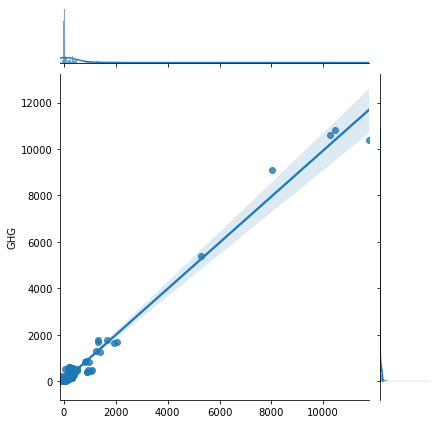

In [591]:
sns.jointplot(x=test_set_pred, y=y_test, kind='reg');

## Plot Electricity Consumption vs. CO2 Emissions colored by Year

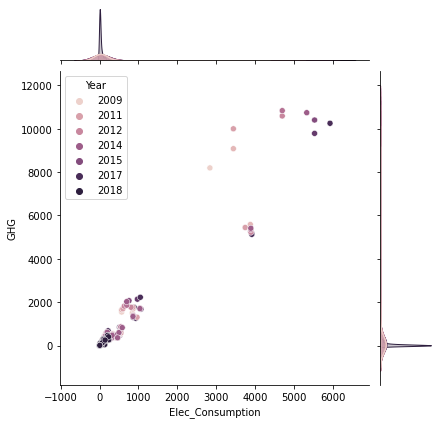

In [592]:
sns.jointplot(data=dfg, x="Elec_Consumption", y="GHG", hue="Year");

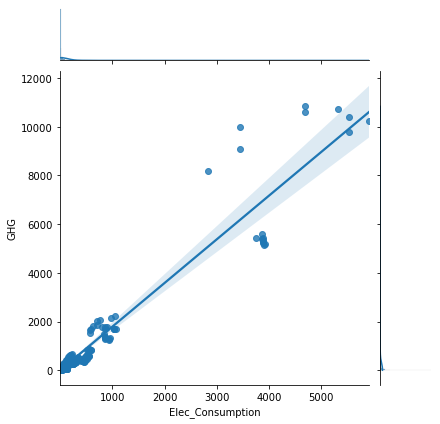

In [604]:
sns.jointplot(data=dfg, x="Elec_Consumption", y="GHG", kind = 'reg');

# Plot a few of the most important features (from LARS) vs. target

## Electricity consumption vs CO2 emissions

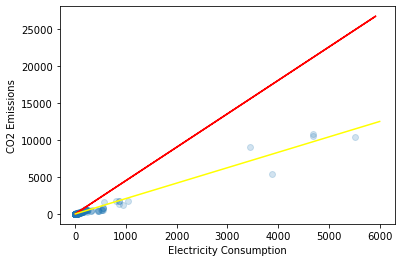

In [603]:
plt.scatter(X_test['Elec_Consumption'], y_test, alpha=0.2)
plt.plot(X['Elec_Consumption'], ridge_model.alpha_ * X['Elec_Consumption'], color='red')
plt.plot([0, 6000], [0, 12500], color='yellow')
plt.xlabel("Electricity Consumption")
plt.ylabel("CO2 Emissions");

## Population vs CO2 emissions

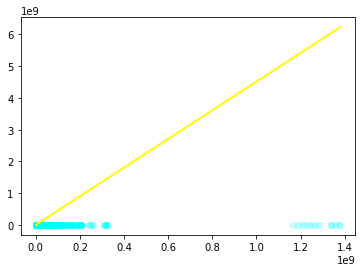

In [497]:
plt.scatter(X['Population'], y, alpha=0.2, color='cyan')
plt.plot(X['Population'], ridge_model.alpha_ * X['Population'], color='yellow')

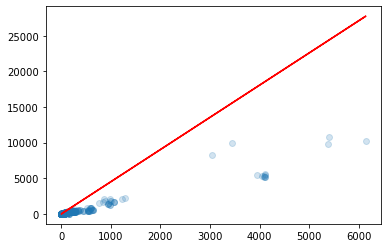

In [510]:
plt.scatter(X['Elec_Production'], y, alpha=0.2)
plt.plot(X['Elec_Production'], ridge_model.alpha_ * X['Elec_Production'], color='red')

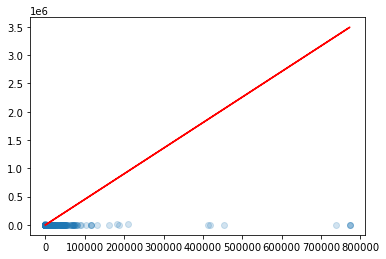

In [500]:
plt.scatter(X['Gas_Consumption'], y, alpha=0.2)
plt.plot(X['Gas_Consumption'], ridge_model.alpha_ * X['Gas_Consumption'], color='red')

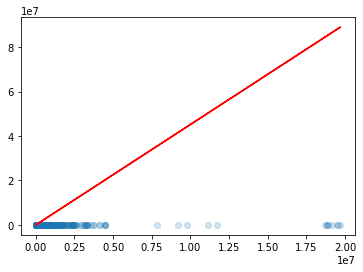

In [501]:
plt.scatter(X['Oil_Consumption'], y, alpha=0.2)
plt.plot(X['Oil_Consumption'], ridge_model.alpha_ * X['Oil_Consumption'], color='red')

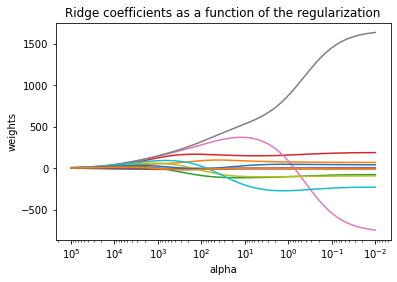

In [520]:
# #############################################################################
# Compute paths

n_alphas = 200
alphas = np.logspace(-2, 5, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X_train_scaled, y_train)
    coefs.append(ridge.coef_)

# #############################################################################
# Display results

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show();

In [ ]:
sns.jointplot(y_pred, y_holdout, kind='regplot')

In [470]:
from sklearn.pipeline import Pipeline

r1 = RidgeCV(cv=5)
pipe = Pipeline([('scaler', StandardScaler()), ('ridge', r1)])
pipe.fit(X_val, y_val)
pipe.score(X_val, y_val)

0.9971478059169262

In [471]:
# alpha used in final model
pipe.named_steps['ridge'].alpha_

0.1

In [472]:
# final RMSE
import math
math.sqrt(mean_squared_error(y_val, pipe.predict(X_val)))

51.88459116233548

In [473]:
final_model = pipe

In [474]:
# no real need to drop the features with zero coefficients after lasso penalization. Helps to keep them for interpretability, and in this case does not take up a lot of computational resources leaving them in
for col, coef in zip(X_val.columns, pipe.named_steps['ridge'].coef_):
    print(f'{col}: {coef}')

Year: -6.038956260523504
Land_Area: -2.6672343370175073
Water_Area: -69.87526810505172
Population: 122.94592801707414
GDP: 5.560205708102563
Poverty_Pct: -3.1603059681837693
Elec_Production: 87.25124883571046
Elec_Consumption: 967.2915321298209
Oil_Production: 4.211117490572348
Oil_Consumption: -217.55353787913018
Gas_Production: 86.32033426365638
Gas_Consumption: -4.711200597412145


In [475]:
# final coefficients, sorted
d = {}
for col, coef in zip(X_val.columns, pipe.named_steps['ridge'].coef_):
    d[col] = round(coef, 2)
dict(sorted(d.items(), key=lambda item: item[1]))

{'Oil_Consumption': -217.55,
 'Water_Area': -69.88,
 'Year': -6.04,
 'Gas_Consumption': -4.71,
 'Poverty_Pct': -3.16,
 'Land_Area': -2.67,
 'Oil_Production': 4.21,
 'GDP': 5.56,
 'Gas_Production': 86.32,
 'Elec_Production': 87.25,
 'Population': 122.95,
 'Elec_Consumption': 967.29}

In [476]:
from sklearn.pipeline import Pipeline

r1 = RidgeCV(cv=5)
pipe = Pipeline([('scaler', StandardScaler()), ('ridge', r1)])
pipe.fit(X_test, y_test)
pipe.score(X_test, y_test)

0.987391922325813

In [477]:
# alpha used in final model
pipe.named_steps['ridge'].alpha_

1.0

In [478]:
# final RMSE
import math
math.sqrt(mean_squared_error(y_test, pipe.predict(X_test)))

143.33848190364574

In [479]:
final_model = pipe

In [481]:
# no real need to drop the features with zero coefficients after lasso penalization. Helps to keep them for interpretability, and in this case does not take up a lot of computational resources leaving them in
for col, coef in zip(X_test.columns, pipe.named_steps['ridge'].coef_):
    print(f'{col}: {coef}')

Year: -8.052365980536328
Land_Area: 42.2988485736629
Water_Area: -131.81377310185928
Population: 276.1085491559194
GDP: 19.50222046241586
Poverty_Pct: 7.45104649245951
Elec_Production: 479.1259921774679
Elec_Consumption: 774.2182126660057
Oil_Production: -4.9140981498415375
Oil_Consumption: -285.3873879092579
Gas_Production: 96.48488378090067
Gas_Consumption: -20.60598299485027


In [482]:
# final coefficients, sorted
d = {}
for col, coef in zip(X_test.columns, pipe.named_steps['ridge'].coef_):
    d[col] = round(coef, 2)
dict(sorted(d.items(), key=lambda item: item[1]))

{'Oil_Consumption': -285.39,
 'Water_Area': -131.81,
 'Gas_Consumption': -20.61,
 'Year': -8.05,
 'Oil_Production': -4.91,
 'Poverty_Pct': 7.45,
 'GDP': 19.5,
 'Land_Area': 42.3,
 'Gas_Production': 96.48,
 'Population': 276.11,
 'Elec_Production': 479.13,
 'Elec_Consumption': 774.22}